# Project 2 - Obesity prediction
### Group 19
- Ana Costa
- Daniel Rodrigues
- Pedro Moreira

## Data Pre-processing 📊

Data pre-processing plays a crucial role in unsupervised learning for several reasons:

<strong>Data Cleaning:</strong>  🧹 Identifying and handling missing values, outliers, and noisy data ensures reliable and accurate input for the algorithm.

<strong>Feature Scaling:</strong>  ⚖️ Normalizing or standardizing features brings them to a similar scale, preventing dominance by features with larger ranges and ensuring equal weighting.

<strong>Dimensionality Reduction:</strong>  📏 Reducing the number of features through techniques like PCA or t-SNE improves computational efficiency and facilitates visualization.

H<strong>andling Categorical Variables:</strong>  🔄 Transforming categorical variables into numerical representations, like one-hot encoding, enables compatibility with unsupervised algorithms.

<strong>Outlier Detection:</strong> 🚫 Detecting and addressing outliers using statistical or density-based methods improves accuracy and reliability.

By performing data pre-processing, we enhance data quality, eliminate noise and inconsistencies, and enable accurate clustering, anomaly detection, and pattern discovery in unsupervised learning.

In [330]:
import pandas as pd
import numpy as np
from scipy import stats


obesity_data = pd.read_csv('data/obesity_dataset.csv')
obesity_data_original_untouched = obesity_data.copy()
target = 'NObeyesdad'

obesity_data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC   
0  Female  21.0    1.62    64.0                            yes   no   2.0  \
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC   
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no  \
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

Previewing the data is important as it helps understand its structure and quality, assess data issues, select relevant features, visualize variables, and plan data preparation. It provides insights for decision-making, such as data cleaning and pre-processing. By exploring the data, patterns and relationships can be identified, facilitating effective analysis. Overall, previewing the data is a crucial step for gaining initial understanding, addressing quality issues, and planning subsequent data processing and analysis steps.

<strong> Checking for missing values </strong>

In [331]:
obesity_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<strong> Duplicate Data: </strong>

In [332]:
obesity_data.duplicated().sum()

24

Since we found there are duplicated lines we are now going to eliminate them

In [333]:
obesity_data = obesity_data.drop_duplicates(keep='first')
obesity_data.duplicated().sum()

0

In [334]:
obesity_data.describe()

Age       Height       Weight         FCVC          NCP   
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000  \
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.000000     0.630866  
75%       2.466193     1.678102     1.000000  
max       3.000000     3.000000     2.000000

Describing the data allows us to understand that there are no missing values since we have 2111 lines and exactly 2111 full cells for every one of our attributes. 

<strong>Measures of Central Tendency:</strong>

The average value for each attribute is estimated using the mean value. For instance, the average age is roughly 24.31 years old, the average height is roughly 1.70 meters, and the average weight is roughly 86.59 kg.

The center value in the dataset is known as the median. For instance, the average age is around 22.78 years old, the average height is about 1.70 meters, and the average weight is about 83.00 kg.

<strong>Measures of Dispersion:</strong>

The standard deviation (std) reflects how widely the data are dispersed from the mean. For instance, the standard deviations of age, height, and weight are each around 6.35 years, 0.09 meters, and 26.19 kg, respectively.

Minimum (min): The minimum value denotes the lowest value that has been observed for a certain feature.

Quartiles (25%): The value below which 25% of the data falls is represented by the first quartile's 25th percentile.

Basic statistics of the dataset are summarized in the provided information, but more investigation and analysis are required to acquire a deeper understanding of the data and any underlying patterns or linkages.


<strong> Searching for outliers </strong>

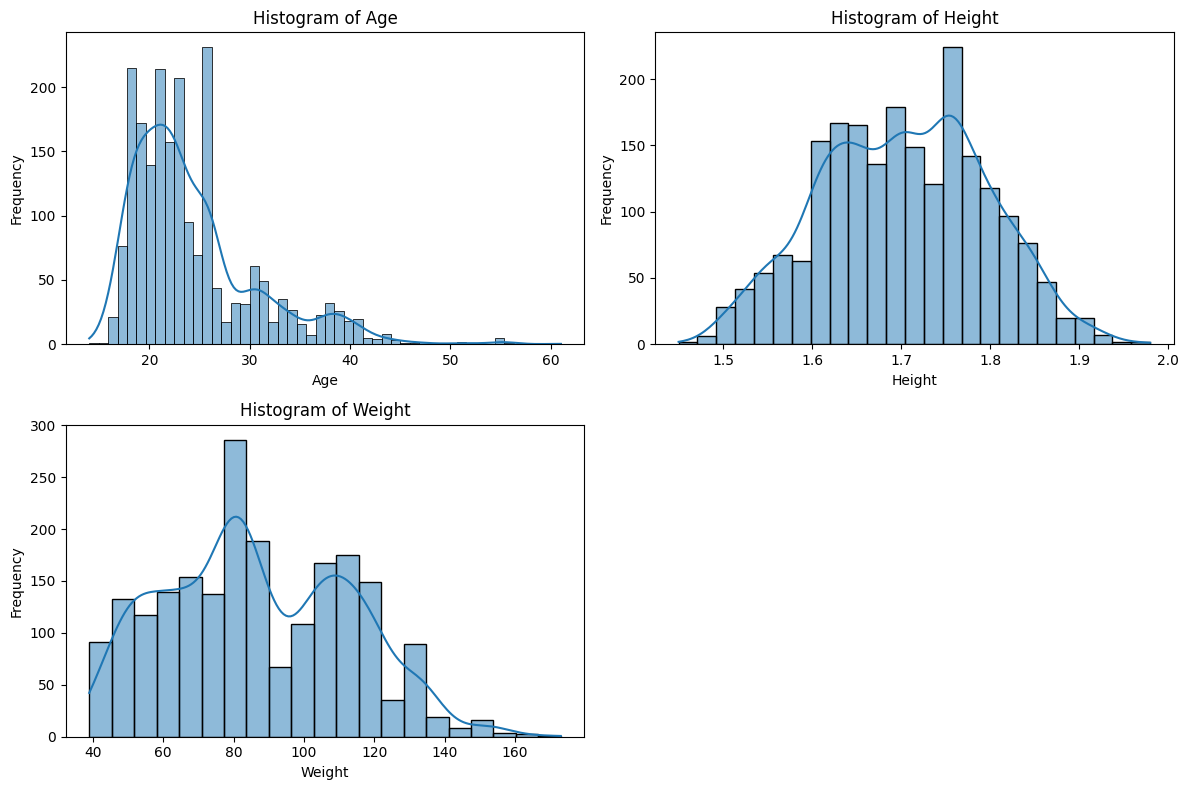

In [335]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# sb.pairplot(obesity_data, hue='NObeyesdad')

numerical_columns = ["Age", "Height", "Weight"]

num_columns = len(numerical_columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sb.histplot(data=obesity_data, x=column, kde=True, ax=ax)
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# If the number of variables is odd, remove the empty subplot
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()








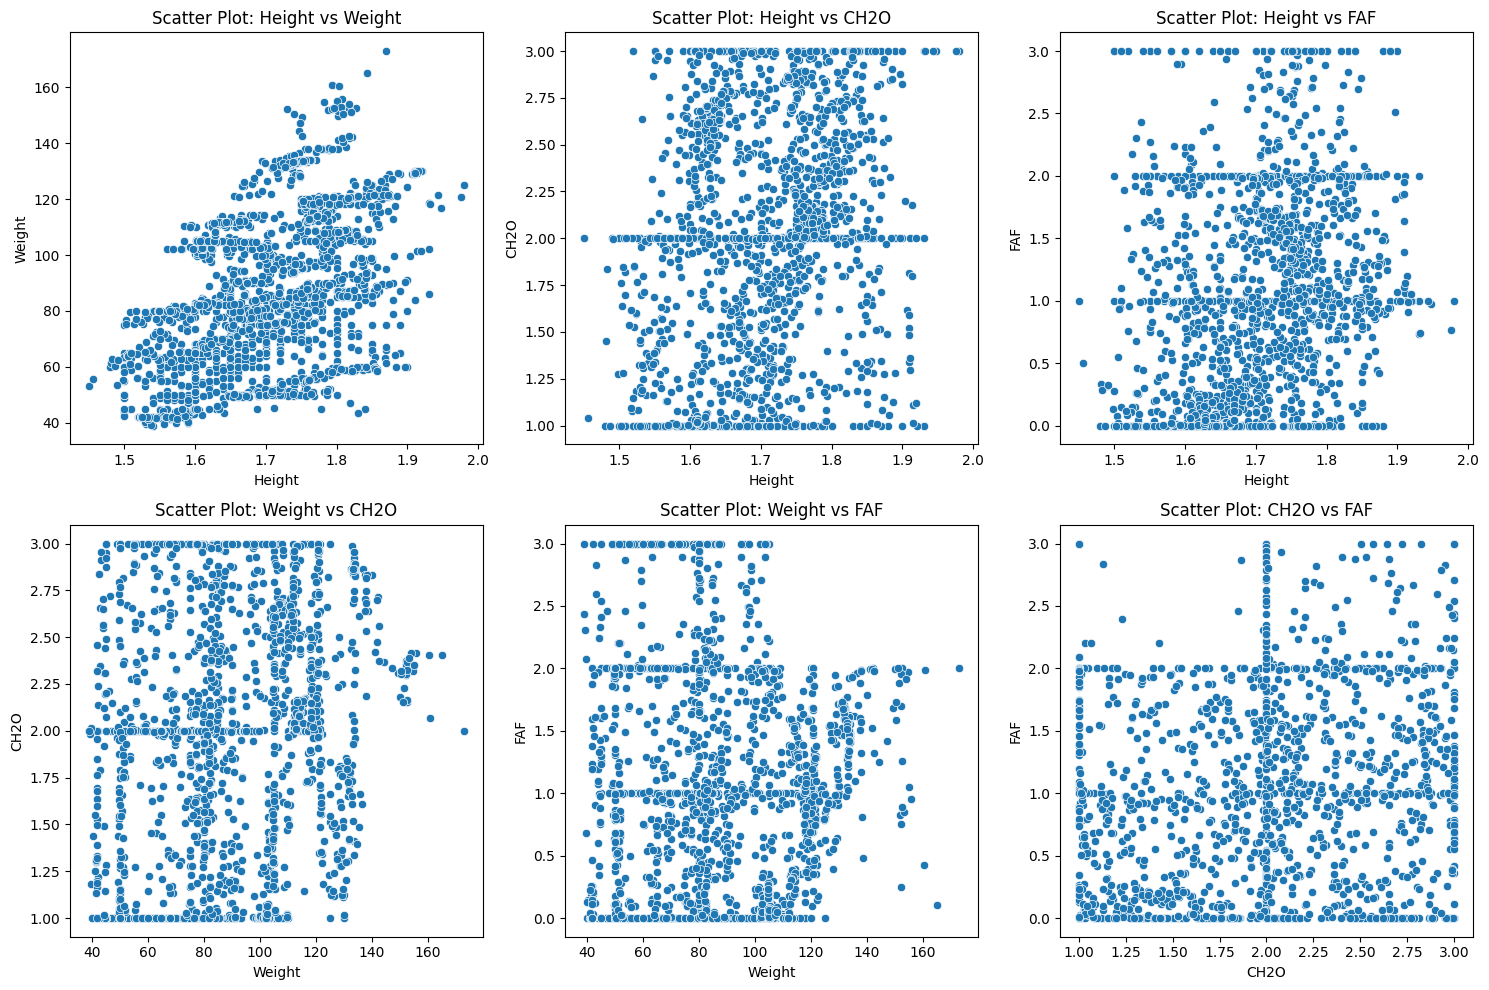

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot():
# Define the number of columns per row
    columns_per_row = 3
    numerical_columns = ["Height", "Weight", "CH2O", "FAF"]
    # Calculate the total number of rows needed
    total_plots = len(numerical_columns) * (len(numerical_columns) - 1) // 2
    total_rows = (total_plots + columns_per_row - 1) // columns_per_row

    # Create the overall figure and axis objects
    fig, axs = plt.subplots(total_rows, columns_per_row, figsize=(15, 10))

    # Flatten the axis objects to make indexing easier
    axs = axs.flatten()

    # Iterate over the numerical columns combinations
    plot_index = 0
    for i in range(len(numerical_columns)):
        for j in range(i + 1, len(numerical_columns)):
            # Set the current axis for the plot
            ax = axs[plot_index]

            # Generate the scatter plot
            sns.scatterplot(data=obesity_data, x=numerical_columns[i], y=numerical_columns[j], ax=ax)

            # Set plot title, x-axis label, and y-axis label
            ax.set_title(f"Scatter Plot: {numerical_columns[i]} vs {numerical_columns[j]}")
            ax.set_xlabel(numerical_columns[i])
            ax.set_ylabel(numerical_columns[j])

            # Move to the next axis
            plot_index += 1

    # Remove empty subplots if the total number of plots is not a multiple of columns_per_row
    if total_plots % columns_per_row != 0:
        for j in range(total_plots % columns_per_row, columns_per_row):
            fig.delaxes(axs[plot_index])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the plots
    plt.show()

scatter_plot()


Looking at our histograms and scatter plots it's not very easy to spot and identify outliers so we shall use other methods like z-score.

The z-score method is a statistical technique used to identify outliers in a dataset. It measures how many standard deviations a data point is away from the mean of the dataset. The z-score of a data point is calculated as:

z = (x - μ) / σ


Quantity of outliers:

In [337]:
init = obesity_data.count()

In [338]:
# Select the columns of interest
selected_columns = ["Height", "Weight", "CH2O", "FAF", "NCP", "TUE"]
selected_data = obesity_data[selected_columns]

# Calculate the z-scores for each column
z_scores = np.abs(stats.zscore(selected_data))

# Define the threshold for outliers
threshold = 3

# Find the indices of the outliers based on the z-scores
outlier_indices = np.where(z_scores > threshold)

# Print the indices and corresponding values of the outliers
rows2remove = []
for row, column in zip(*outlier_indices):
    value = selected_data.iloc[row, column]
    print(f"Outlier found at index ({row}, {column}): {value}")
    rows2remove.append(row)


obesity_data = obesity_data.drop(rows2remove)


Outlier found at index (337, 1): 173.0


In [339]:
init - obesity_data.count()

Gender                            1
Age                               1
Height                            1
Weight                            1
family_history_with_overweight    1
FAVC                              1
FCVC                              1
NCP                               1
CAEC                              1
SMOKE                             1
CH2O                              1
SCC                               1
FAF                               1
TUE                               1
CALC                              1
MTRANS                            1
NObeyesdad                        1
dtype: int64

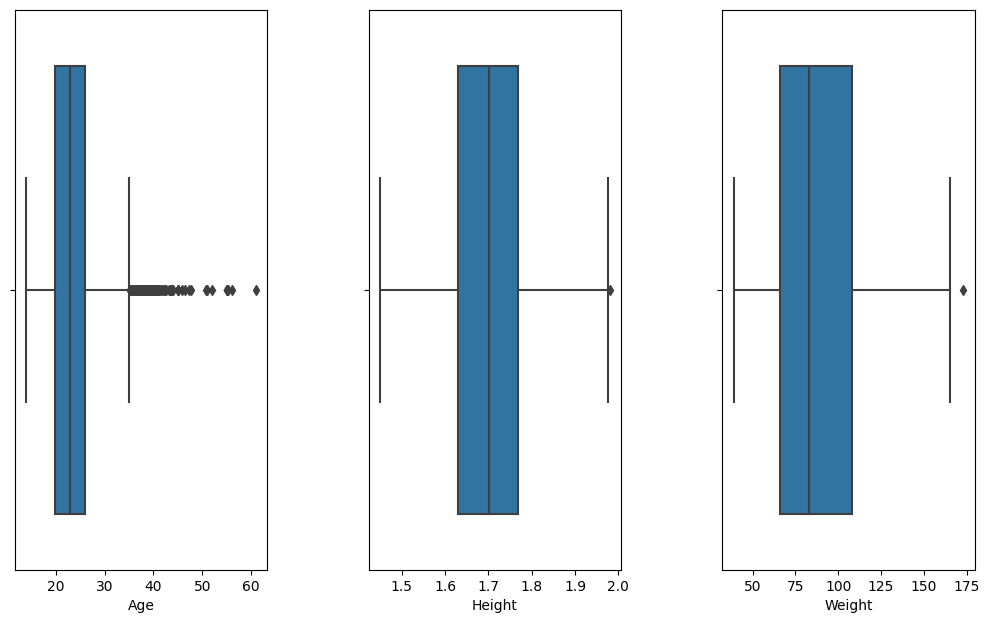

In [340]:
import seaborn as sb
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 4))  # Create a 1x3 grid for subplots

sb.boxplot(x=obesity_data["Age"], orient="h", ax=ax[0])
sb.boxplot(x=obesity_data["Height"], orient="h", ax=ax[1])
sb.boxplot(x=obesity_data["Weight"], orient="h", ax=ax[2])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

As you can see in the height and the weight we can find a few outliers. The code bellow gets ride of them so they don't disturbe our algorithms.

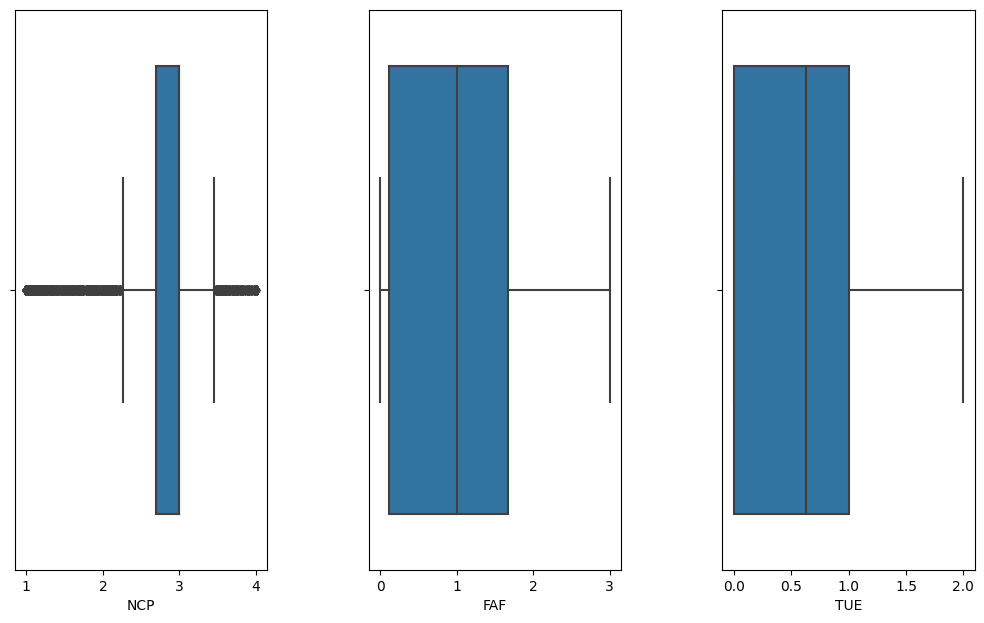

In [341]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))  # Create a 1x3 grid for subplots

sb.boxplot(x=obesity_data["NCP"], orient="h", ax=ax[0])
sb.boxplot(x=obesity_data["FAF"], orient="h", ax=ax[1])
sb.boxplot(x=obesity_data["TUE"], orient="h", ax=ax[2])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

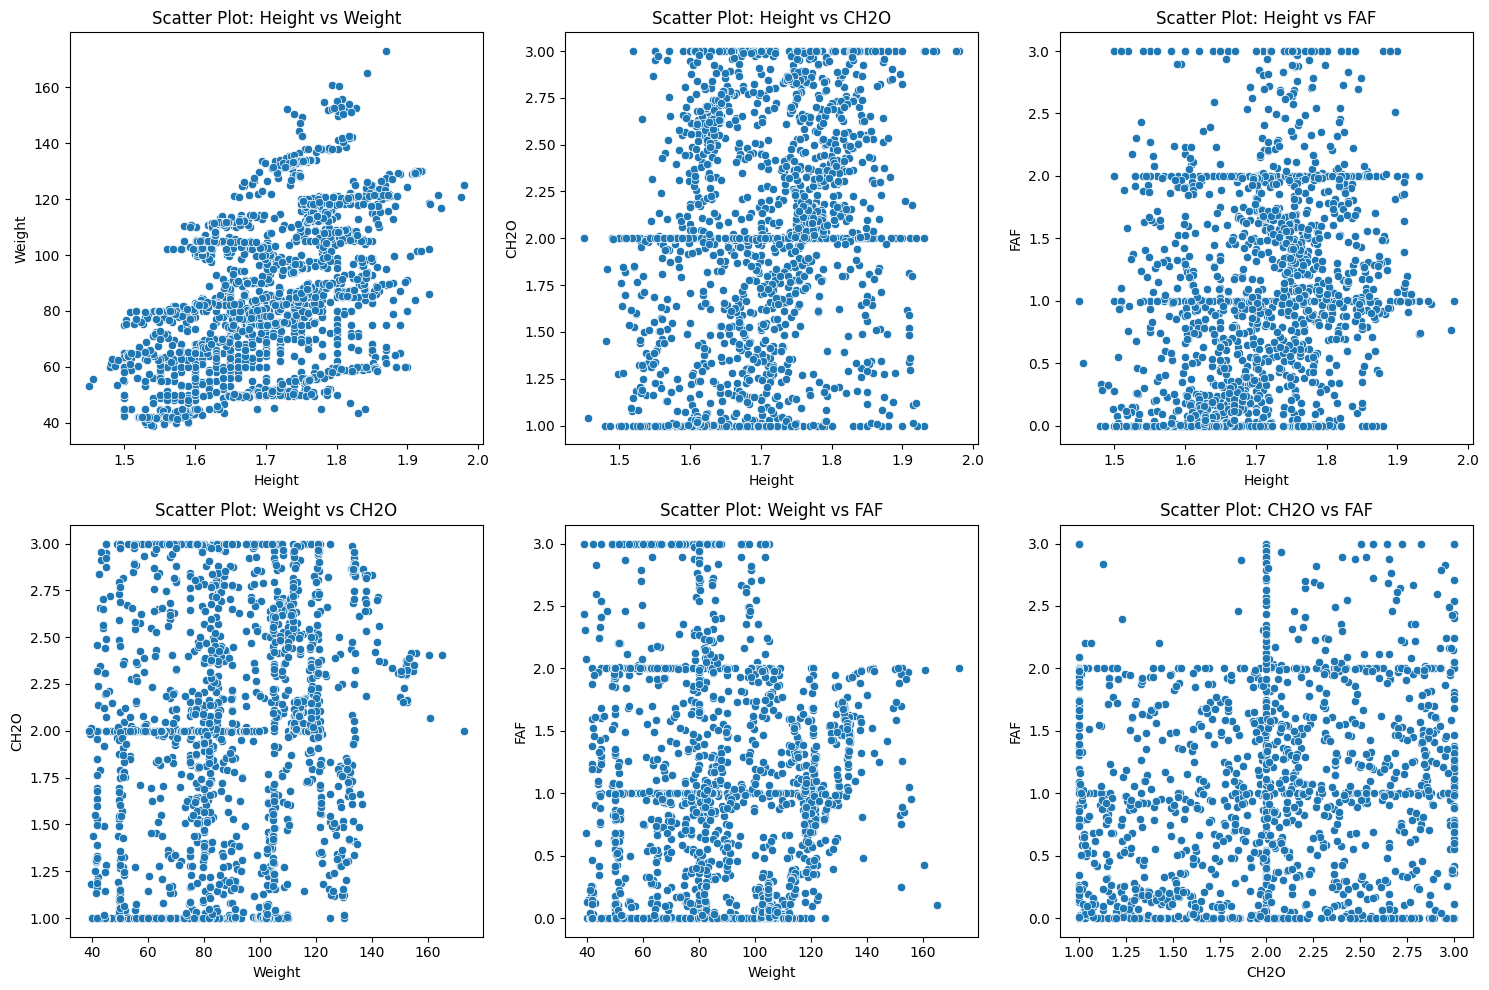

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot():
# Define the number of columns per row
    columns_per_row = 3
    numerical_columns = ["Height", "Weight", "CH2O", "FAF"]
    # Calculate the total number of rows needed
    total_plots = len(numerical_columns) * (len(numerical_columns) - 1) // 2
    total_rows = (total_plots + columns_per_row - 1) // columns_per_row

    # Create the overall figure and axis objects
    fig, axs = plt.subplots(total_rows, columns_per_row, figsize=(15, 10))

    # Flatten the axis objects to make indexing easier
    axs = axs.flatten()

    # Iterate over the numerical columns combinations
    plot_index = 0
    for i in range(len(numerical_columns)):
        for j in range(i + 1, len(numerical_columns)):
            # Set the current axis for the plot
            ax = axs[plot_index]

            # Generate the scatter plot
            sns.scatterplot(data=obesity_data, x=numerical_columns[i], y=numerical_columns[j], ax=ax)

            # Set plot title, x-axis label, and y-axis label
            ax.set_title(f"Scatter Plot: {numerical_columns[i]} vs {numerical_columns[j]}")
            ax.set_xlabel(numerical_columns[i])
            ax.set_ylabel(numerical_columns[j])

            # Move to the next axis
            plot_index += 1

    # Remove empty subplots if the total number of plots is not a multiple of columns_per_row
    if total_plots % columns_per_row != 0:
        for j in range(total_plots % columns_per_row, columns_per_row):
            fig.delaxes(axs[plot_index])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the plots
    plt.show()

scatter_plot()


In the first quadrant of the CH20 vs FAF, there are a few outliers. This is also true for the scatter plot Weight vs FAF, Weight vs CH2O and height vs FAF. They will all be removed in the following code:

In [343]:
drop_rows = set()

for index, row in obesity_data.iterrows():
    if row['Height'] > 1.96:
        drop_rows.add(index)
    if row['Weight'] > 159:
        drop_rows.add(index)
    if row['FAF'] > 1.97 and row['CH2O'] < 1.97:
        drop_rows.add(index)
    if row['Height'] < 1.47:
        drop_rows.add(index)
    if row['Weight'] > 135 and row['FAF'] < 0.4:
        drop_rows.add(index)

print(drop_rows)

obesity_data = obesity_data.drop(drop_rows)

{512, 1537, 1538, 1563, 540, 544, 546, 547, 36, 548, 570, 571, 572, 574, 575, 1604, 584, 89, 90, 1628, 1629, 620, 621, 116, 630, 134, 1671, 160, 676, 1701, 682, 683, 684, 1211, 1724, 708, 710, 711, 720, 1782, 247, 263, 265, 274, 1301, 1302, 795, 803, 312, 316, 321, 1350, 330, 334, 335, 339, 344, 346, 349, 350, 352, 865, 1377, 1898, 882, 1909, 1910, 376, 378, 381, 894, 902, 396, 416, 428, 432, 445, 1481, 463, 481, 1515, 1516, 493, 502}


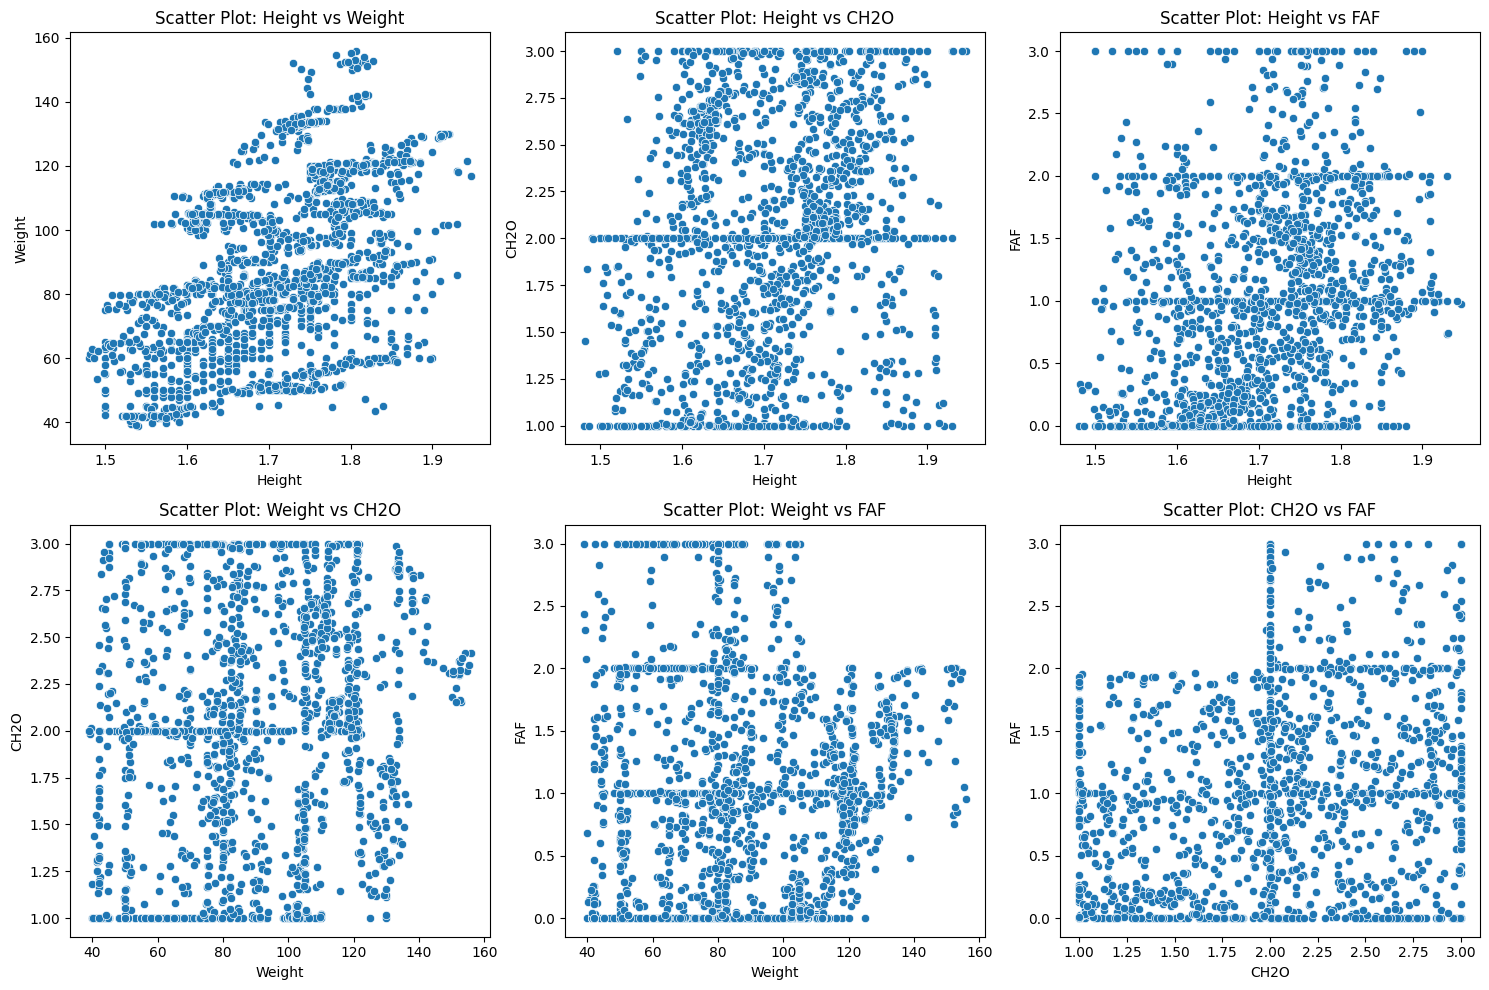

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot():
# Define the number of columns per row
    columns_per_row = 3
    numerical_columns = ["Height", "Weight", "CH2O", "FAF"]
    # Calculate the total number of rows needed
    total_plots = len(numerical_columns) * (len(numerical_columns) - 1) // 2
    total_rows = (total_plots + columns_per_row - 1) // columns_per_row

    # Create the overall figure and axis objects
    fig, axs = plt.subplots(total_rows, columns_per_row, figsize=(15, 10))

    # Flatten the axis objects to make indexing easier
    axs = axs.flatten()

    # Iterate over the numerical columns combinations
    plot_index = 0
    for i in range(len(numerical_columns)):
        for j in range(i + 1, len(numerical_columns)):
            # Set the current axis for the plot
            ax = axs[plot_index]

            # Generate the scatter plot
            sns.scatterplot(data=obesity_data, x=numerical_columns[i], y=numerical_columns[j], ax=ax)

            # Set plot title, x-axis label, and y-axis label
            ax.set_title(f"Scatter Plot: {numerical_columns[i]} vs {numerical_columns[j]}")
            ax.set_xlabel(numerical_columns[i])
            ax.set_ylabel(numerical_columns[j])

            # Move to the next axis
            plot_index += 1

    # Remove empty subplots if the total number of plots is not a multiple of columns_per_row
    if total_plots % columns_per_row != 0:
        for j in range(total_plots % columns_per_row, columns_per_row):
            fig.delaxes(axs[plot_index])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the plots
    plt.show()

scatter_plot()


## Feature engineering 💡🔧

We've decided to aggregate the Weight and Height into a BMI attribute since it is much more representative and better fitting for what we are trying to find

In [345]:
obesity_data_feature_engineering = obesity_data
# Criar a nova feature 'BMI_category'
obesity_data_feature_engineering.insert(16, 'BMI', obesity_data['Weight'] / (obesity_data['Height'] ** 2))
obesity_data_feature_engineering.drop(columns=['Height', 'Weight'], inplace=True)


obesity_data_feature_engineering.head()


Gender   Age family_history_with_overweight FAVC  FCVC  NCP       CAEC   
0  Female  21.0                            yes   no   2.0  3.0  Sometimes  \
1  Female  21.0                            yes   no   3.0  3.0  Sometimes   
2    Male  23.0                            yes   no   2.0  3.0  Sometimes   
3    Male  27.0                             no   no   3.0  3.0  Sometimes   
4    Male  22.0                             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS        BMI   
0    no   2.0   no  0.0  1.0          no  Public_Transportation  24.386526  \
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation  24.238227   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation  23.765432   
3    no   2.0   no  2.0  0.0  Frequently                Walking  26.851852   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation  28.342381   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

<strong>Data encoding</strong> will allow categorical variables to be represented numerically, ensuring compatibility with algorithms and preserving information. It prevents misinterpretations and enables distance-based calculations. 💡 Encoding reduces memory usage and supports efficient computation.

In [346]:
obesity_data_clean = obesity_data

In [347]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for columnName in obesity_data_clean.columns:
    if obesity_data_clean[columnName].dtype == "float64":
        continue
   
    obesity_data_clean[columnName] = label_encoder.fit_transform(obesity_data_clean[columnName])
    obesity_data_clean[columnName].unique()

obesity_data_clean.head()



Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE   
0       0  21.0                               1     0   2.0  3.0     2      0  \
1       0  21.0                               1     0   3.0  3.0     2      1   
2       1  23.0                               1     0   2.0  3.0     2      0   
3       1  27.0                               0     0   3.0  3.0     2      0   
4       1  22.0                               0     0   2.0  1.0     2      0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS        BMI  NObeyesdad  
0   2.0    0  0.0  1.0     3       3  24.386526           1  
1   3.0    1  3.0  0.0     2       3  24.238227           1  
2   2.0    0  2.0  1.0     1       3  23.765432           1  
3   2.0    0  2.0  0.0     1       4  26.851852           5  
4   2.0    0  0.0  0.0     2       3  28.342381           6

Dimensionality reduction techniques address the curse of dimensionality. 📏 Handling missing data and creating interpretable features enhance model robustness and explainability. 

In [348]:
#Performing Feature Scaling

from sklearn.preprocessing import StandardScaler


# select the columns you want to scale
cols_to_scale = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','BMI']

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the selected columns
scaler.fit(obesity_data_clean[cols_to_scale])

# transform the selected columns
obesity_data_clean[cols_to_scale] = scaler.transform(obesity_data_clean[cols_to_scale])

obesity_data_clean = pd.DataFrame(obesity_data_clean, columns=[
'Gender','Age','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','BMI','NObeyesdad'])

obesity_data_clean.head()


Gender       Age  family_history_with_overweight  FAVC      FCVC       NCP   
0       0 -0.532522                               1     0 -0.792142  0.409767  \
1       0 -0.532522                               1     0  1.095598  0.409767   
2       1 -0.217462                               1     0 -0.792142  0.409767   
3       1  0.412659                               0     0  1.095598  0.409767   
4       1 -0.374992                               0     0 -0.792142 -2.193800   

   CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS       BMI   
0     2      0 -0.058785    0 -1.157902  0.561474     3       3 -0.699628  \
1     2      1  1.623260    1  2.421968 -1.087115     2       3 -0.718319   
2     2      0 -0.058785    0  1.228678  0.561474     1       3 -0.777908   
3     2      0 -0.058785    0  1.228678 -1.087115     1       4 -0.388910   
4     2      0 -0.058785    0 -1.157902 -1.087115     2       3 -0.201051   

   NObeyesdad  
0           1  
1           1  
2           1  
3           5  
4           6

## Feature selection 

Removing correlated inputs in data preprocessing is crucial for improving model performance by avoiding multicollinearity and overfitting. It eliminates redundant information, reduces dimensionality, and enhances interpretability of the model's results. By removing correlated inputs, we can ensure that the independence assumption holds, enabling machine learning algorithms to work optimally and provide accurate predictions. Overall, this step simplifies the data representation, promotes generalization, and helps the model make more meaningful and reliable predictions on unseen data.

We use <strong>Pearson correlation</strong>  to quantify the linear relationship between two continuous variables. It ranges from -1 to 1, where a value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 suggests no significant correlation.

It's important to note that Pearson correlation only captures linear relationships and may not detect non-linear associations.

Gender       Age  family_history_with_overweight  FAVC      FCVC       NCP   
0       0 -0.532522                               1     0 -0.792142  0.409767  \
1       0 -0.532522                               1     0  1.095598  0.409767   
2       1 -0.217462                               1     0 -0.792142  0.409767   
3       1  0.412659                               0     0  1.095598  0.409767   
4       1 -0.374992                               0     0 -0.792142 -2.193800   

   CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS       BMI   
0     2      0 -0.058785    0 -1.157902  0.561474     3       3 -0.699628  \
1     2      1  1.623260    1  2.421968 -1.087115     2       3 -0.718319   
2     2      0 -0.058785    0  1.228678  0.561474     1       3 -0.777908   
3     2      0 -0.058785    0  1.228678 -1.087115     1       4 -0.388910   
4     2      0 -0.058785    0 -1.157902 -1.087115     2       3 -0.201051   

   NObeyesdad  
0           1  
1           1  
2           1  
3           5  
4           6

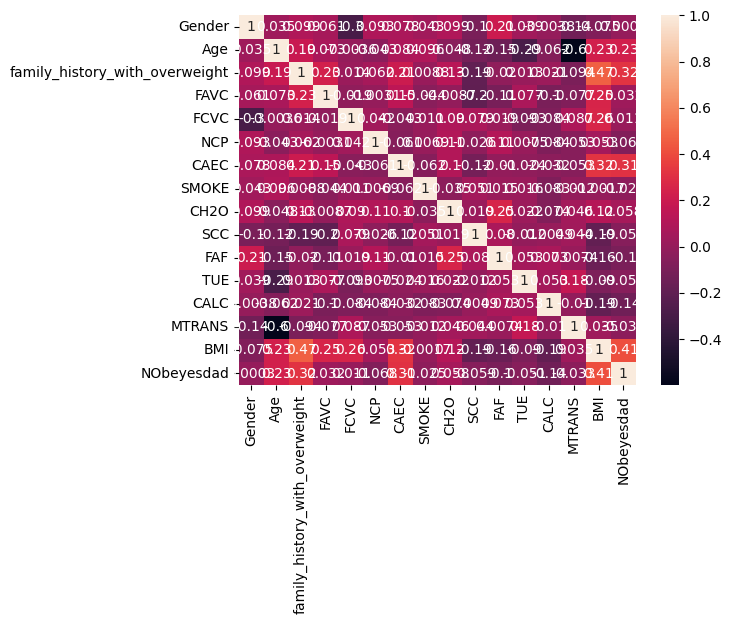

In [349]:
# calculate the correlation matrix
corr_matrix = obesity_data_clean.corr()

# plot the correlation matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

# create a list of highly correlated features to drop
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.65:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

# drop the highly correlated features
obesity_data_clean = obesity_data_clean.drop(corr_features, axis=1)
obesity_data_clean.head()


### Random Forest 🌳

During training, multiple decision trees are constructed. In classification tasks, the class selected by the majority of trees becomes the output of the random forest. Random Forests address the issue of decision trees overfitting to the training set. They tend to outperform individual decision trees but may have lower accuracy compared to gradient boosted trees.



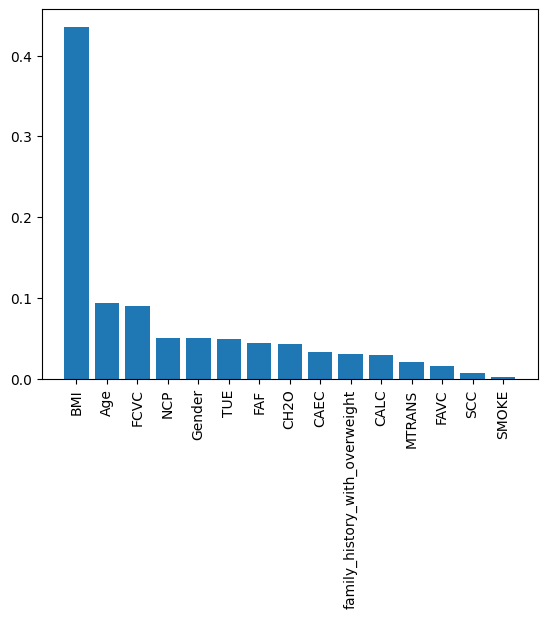

In [350]:
# split data into features (X) and target (y)
X = obesity_data_clean.drop('NObeyesdad', axis=1)
y = obesity_data_clean['NObeyesdad']

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# fit the Random Forest classifier to the training data
rf.fit(X_train, y_train)

# calculate feature importances
importances = rf.feature_importances_

# create a feature importance dataframe
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort the dataframe by feature importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# plot the feature importances
import matplotlib.pyplot as plt
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=90)

# select the top n features
n = 10
top_features = feature_importances['feature'][:n].tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

As we can see in this graph, several columns are unimportant for determining the degree of obesity. Therefore, we decided to create four different datasets to test the different performances of the implemented algorithms. From the complete dataset, columns with less importance were progressively removed.

In [351]:
# create dataset without SCC and SMOKE
obesity_data_exp1 = obesity_data_clean[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI', 'NObeyesdad']]

# create dataset without SCC, SMOKE, MTRANS, CAEC and FAVC
obesity_data_exp2 = obesity_data_clean[['Gender', 'Age', 'family_history_with_overweight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC', 'BMI', 'NObeyesdad']]

# create dataset without SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight and CALC
obesity_data_exp3 = obesity_data_clean[['Gender', 'Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'NObeyesdad']]

## Split Data

##### Datase with all columns

In [352]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = obesity_data_clean.iloc[:, :-1]
y = obesity_data_clean.iloc[:, -1]

def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    return X_train, X_test, y_train, y_test

X0, X_test, y0, y_test = split(X, y)

X0.head()



Gender       Age  family_history_with_overweight  FAVC      FCVC   
2          1 -0.217462                               1     0 -0.792142  \
1636       1  0.350825                               1     1 -0.788223   
1810       0  0.255129                               1     1  1.095598   
1940       0  0.255129                               1     1  1.095598   
529        0 -0.473223                               0     0  1.095598   

           NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS   
2     0.409767     2      0 -0.058785    0  1.228678  0.561474     1       3  \
1636  0.409767     2      0  0.510374    0 -0.086851 -0.953322     2       3   
1810  0.409767     2      0  0.913928    0 -1.157902 -0.275360     2       3   
1940  0.409767     2      0  1.110395    0 -1.157902 -0.405466     2       3   
529   0.780993     1      0 -0.783608    0 -0.506448 -0.312715     2       3   

           BMI  
2    -0.777908  
1636  0.858465  
1810  1.780517  
1940  1.512625  
529  -1.613924

##### Datase without SCC and SMOKE

In [353]:
X = obesity_data_exp1.iloc[:, :-1]
y = obesity_data_exp1.iloc[:, -1]

X1, X_test1, y1, y_test1 = split(X, y)

X1.head()

Gender       Age  family_history_with_overweight  FAVC      FCVC   
2          1 -0.217462                               1     0 -0.792142  \
1636       1  0.350825                               1     1 -0.788223   
1810       0  0.255129                               1     1  1.095598   
1940       0  0.255129                               1     1  1.095598   
529        0 -0.473223                               0     0  1.095598   

           NCP  CAEC      CH2O       FAF       TUE  CALC  MTRANS       BMI  
2     0.409767     2 -0.058785  1.228678  0.561474     1       3 -0.777908  
1636  0.409767     2  0.510374 -0.086851 -0.953322     2       3  0.858465  
1810  0.409767     2  0.913928 -1.157902 -0.275360     2       3  1.780517  
1940  0.409767     2  1.110395 -1.157902 -0.405466     2       3  1.512625  
529   0.780993     1 -0.783608 -0.506448 -0.312715     2       3 -1.613924

##### Datase without SCC, SMOKE, MTRANS, CAEC and FAVC

In [354]:
X = obesity_data_exp2.iloc[:, :-1]
y = obesity_data_exp2.iloc[:, -1]

X2, X_test2, y2, y_test2 = split(X, y)

X2.head()

Gender       Age  family_history_with_overweight      FCVC       NCP   
2          1 -0.217462                               1 -0.792142  0.409767  \
1636       1  0.350825                               1 -0.788223  0.409767   
1810       0  0.255129                               1  1.095598  0.409767   
1940       0  0.255129                               1  1.095598  0.409767   
529        0 -0.473223                               0  1.095598  0.780993   

          CH2O       FAF       TUE  CALC       BMI  
2    -0.058785  1.228678  0.561474     1 -0.777908  
1636  0.510374 -0.086851 -0.953322     2  0.858465  
1810  0.913928 -1.157902 -0.275360     2  1.780517  
1940  1.110395 -1.157902 -0.405466     2  1.512625  
529  -0.783608 -0.506448 -0.312715     2 -1.613924

##### Datase without SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight and CALC

In [355]:
X = obesity_data_exp3.iloc[:, :-1]
y = obesity_data_exp3.iloc[:, -1]

X3, X_test3, y3, y_test3 = split(X, y)

X3.head()

Gender       Age      FCVC       NCP      CH2O       FAF       TUE   
2          1 -0.217462 -0.792142  0.409767 -0.058785  1.228678  0.561474  \
1636       1  0.350825 -0.788223  0.409767  0.510374 -0.086851 -0.953322   
1810       0  0.255129  1.095598  0.409767  0.913928 -1.157902 -0.275360   
1940       0  0.255129  1.095598  0.409767  1.110395 -1.157902 -0.405466   
529        0 -0.473223  1.095598  0.780993 -0.783608 -0.506448 -0.312715   

           BMI  
2    -0.777908  
1636  0.858465  
1810  1.780517  
1940  1.512625  
529  -1.613924

## Data Balancing/Unbalancing Techniques

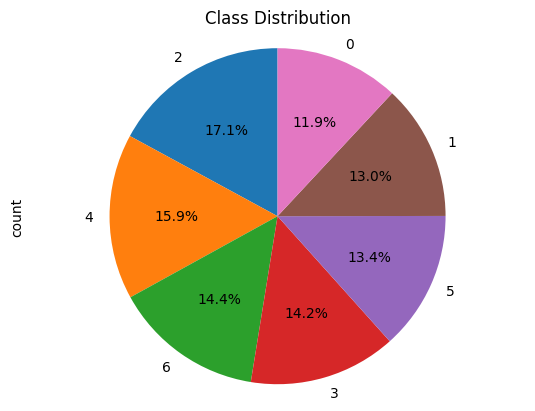

In [356]:
import matplotlib.pyplot as plt

class_counts = obesity_data_clean[target].value_counts()

# Plotting the pie chart
class_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Class Distribution')

# Displaying the chart
plt.axis('equal')
plt.show()


Based on the numbers for the class counts in our dataset, it appears that the classes are not heavily imbalanced. In this case, we decided to slightly improve the balance of our dataset, using random oversampling to adjust the class proportions.

### Random Oversampling
Randomly duplicate samples from the minority classes to match the count of the majority class. This can help increase the representation of the minority classes without significantly inflating the dataset size.

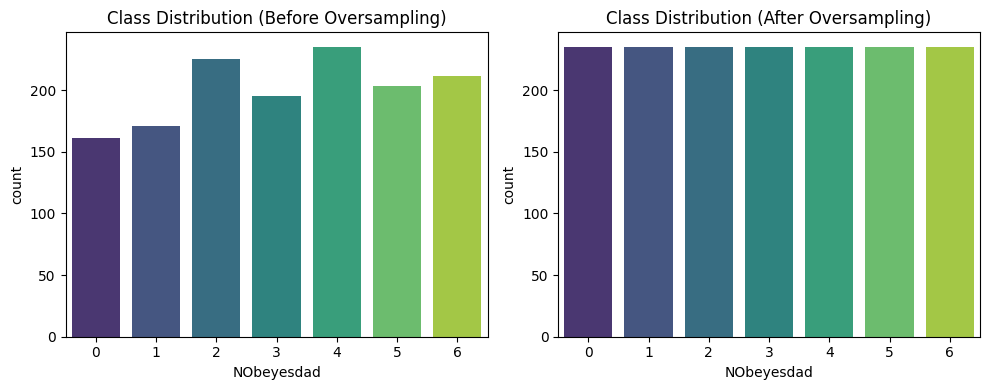

In [357]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Separando features e target
features = obesity_data_clean.drop('NObeyesdad', axis=1)
target = obesity_data_clean['NObeyesdad']

# Dividindo o conjunto de dados em treino e teste
import matplotlib.pyplot as plt
import seaborn as sns

# Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X0, y0)
X_train1, y_train1 = oversampler.fit_resample(X1, y1)
X_train2, y_train2 = oversampler.fit_resample(X2, y2)
X_train3, y_train3 = oversampler.fit_resample(X3, y3)


# Plotting the class distribution before and after oversampling
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y0, palette='viridis')
plt.title('Class Distribution (Before Oversampling)')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution (After Oversampling)')

plt.tight_layout()
plt.show()



### Grid Search with Cross Validation

Grid Search with Cross Validation optimizes hyperparameters by systematically searching for the best combination. It involves evaluating the model's performance for each hyperparameter combination using Cross Validation. By dividing the training data into subsets and iterating through the combinations, it finds the optimal hyperparameters. This technique prevents overfitting and provides a more generalized model. Grid Search with Cross Validation is a powerful method for hyperparameter tuning, ensuring the best model performance by exhaustively exploring the hyperparameter space.

In [358]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB


def cross_folding(model, space, n_folds = 10):
    target_class = obesity_data_clean['NObeyesdad']
    variables_features = obesity_data_clean.drop('NObeyesdad', axis=1)


    cv_inner = KFold(n_splits=n_folds, shuffle=True, random_state=1)

    search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv_inner, refit=True)

    cv_outer = KFold(n_splits=n_folds, shuffle=True, random_state=1)

    scores = cross_val_score(search, variables_features, target_class, scoring='accuracy', cv=cv_outer, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (max(scores), std(scores)))



## Decision Tree Algorithm

##### Testing accuracy of Decision Tree with diferent datasets

--------------------- DATASET WITH ALL COLUMNS --------------------------



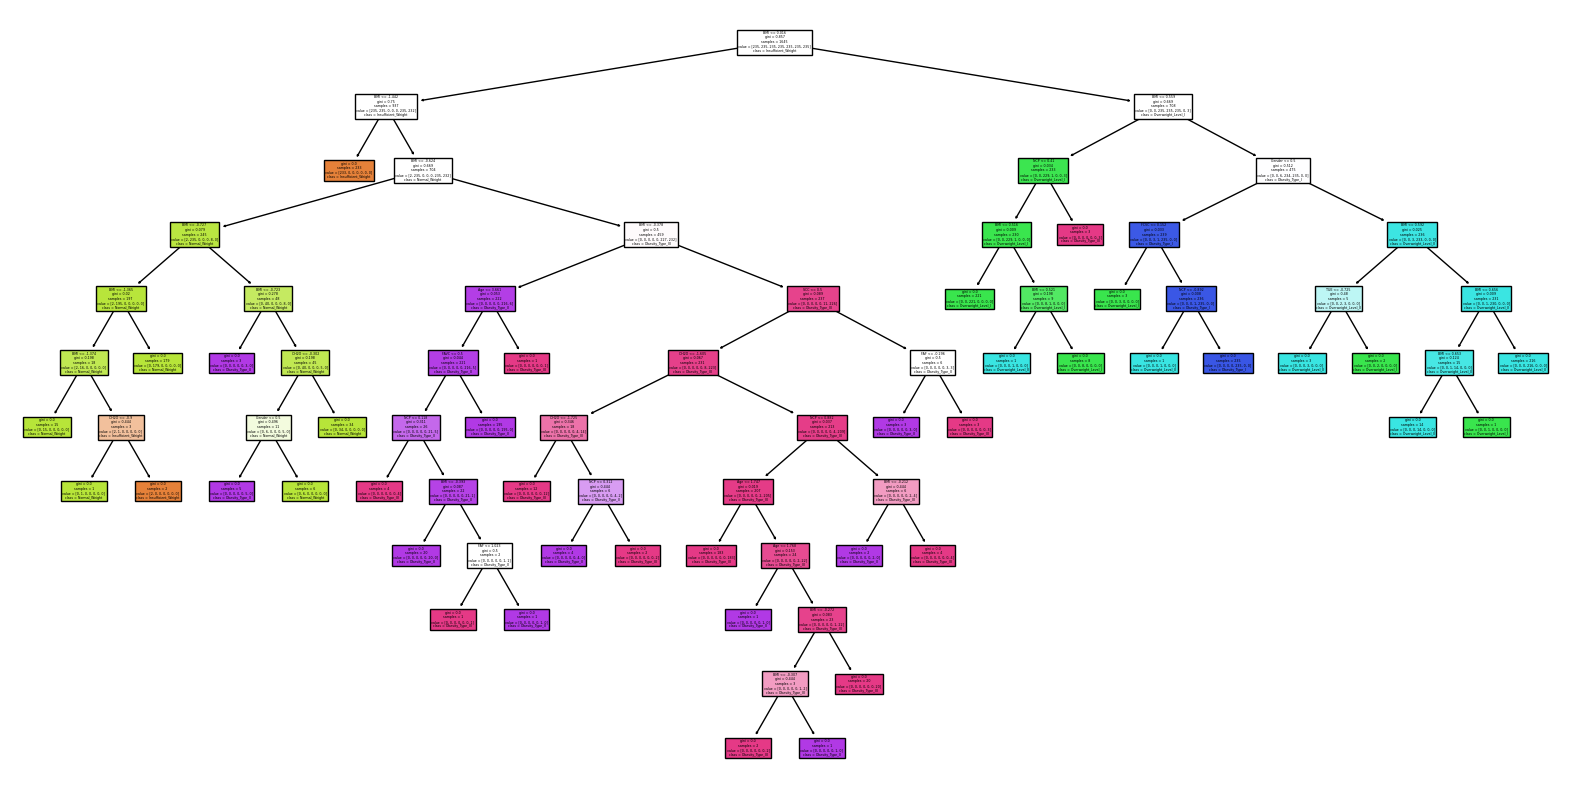

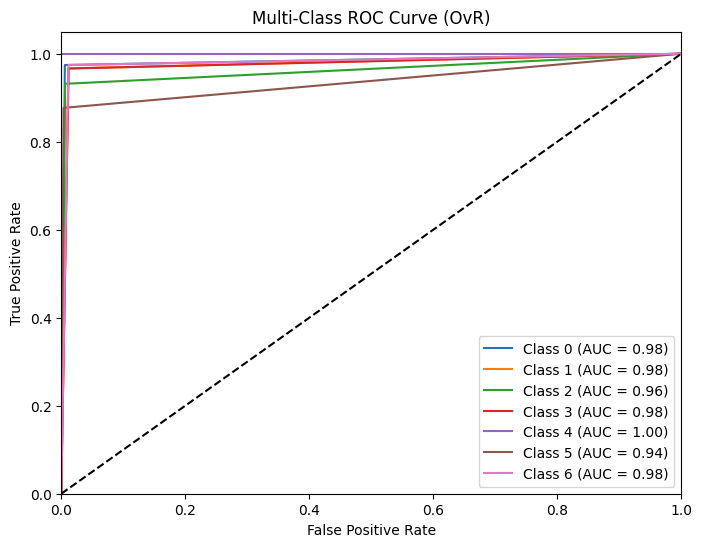

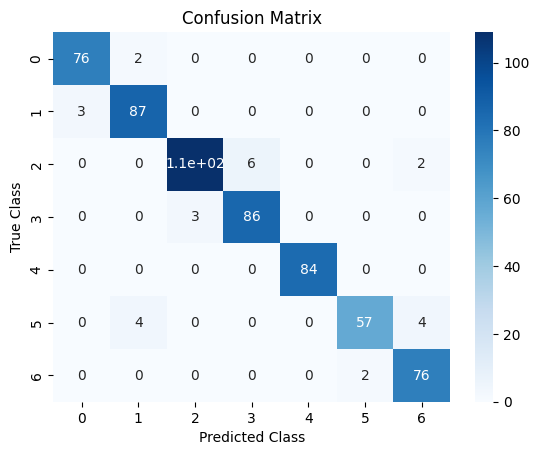

Accuracy:  0.956738768718802
------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------


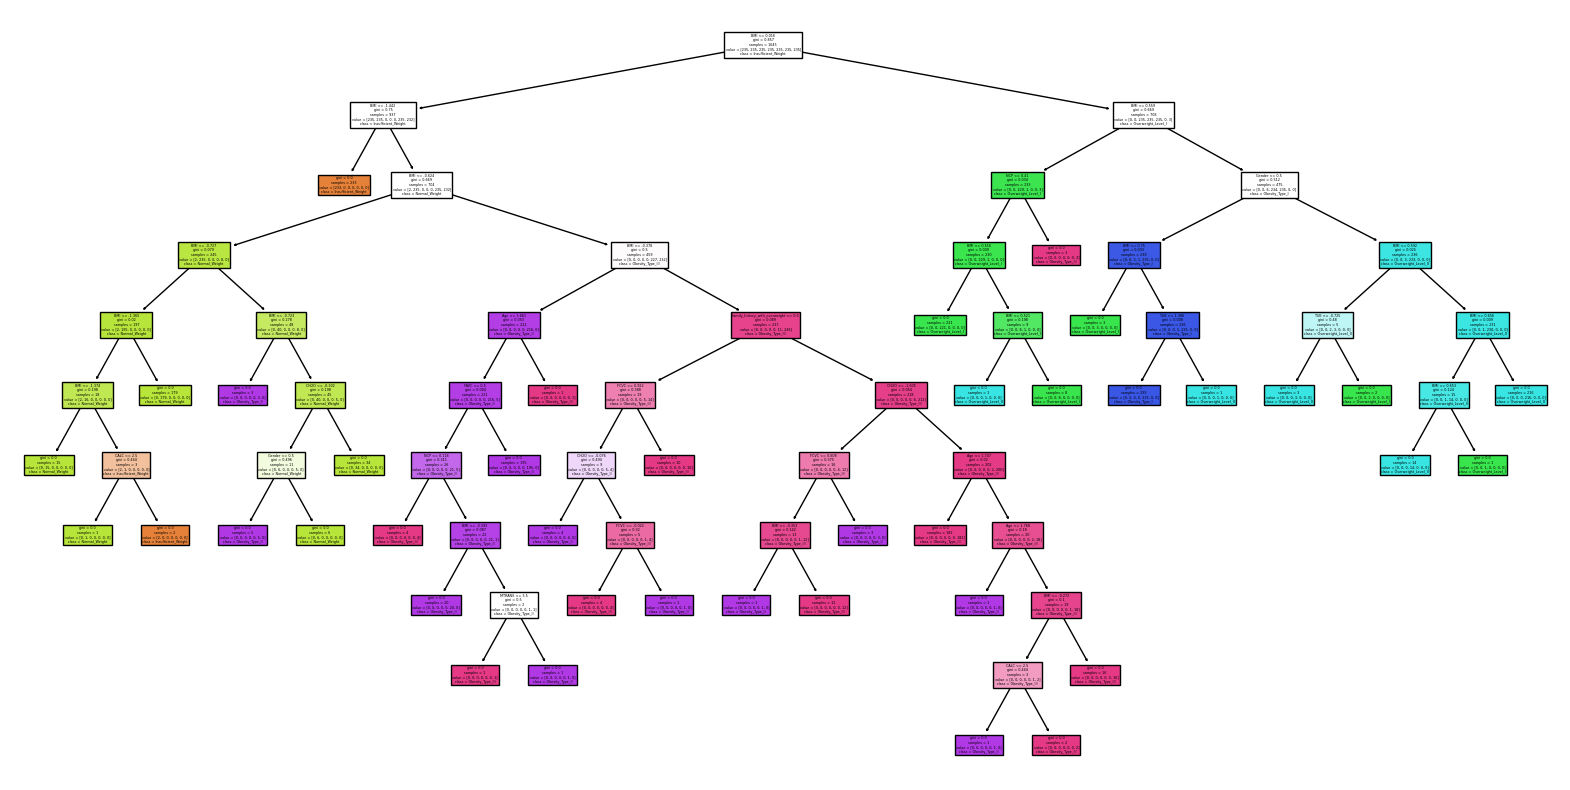

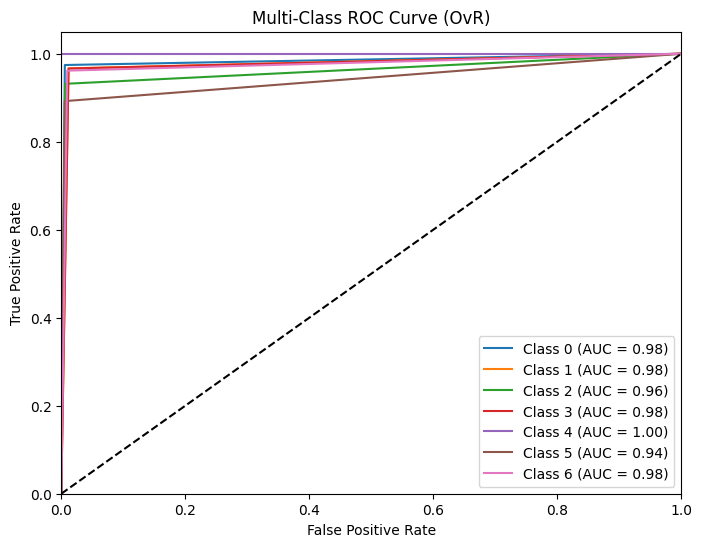

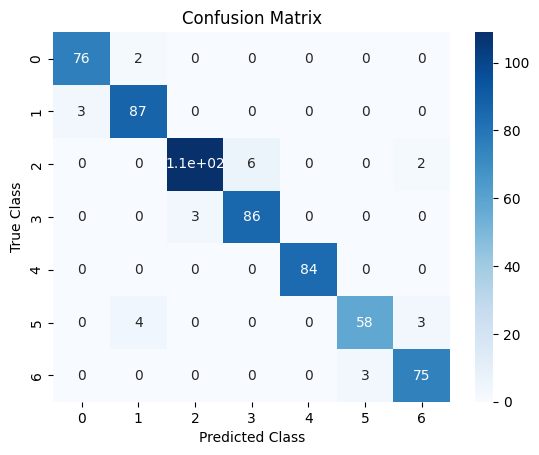

Accuracy:  0.956738768718802
------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------


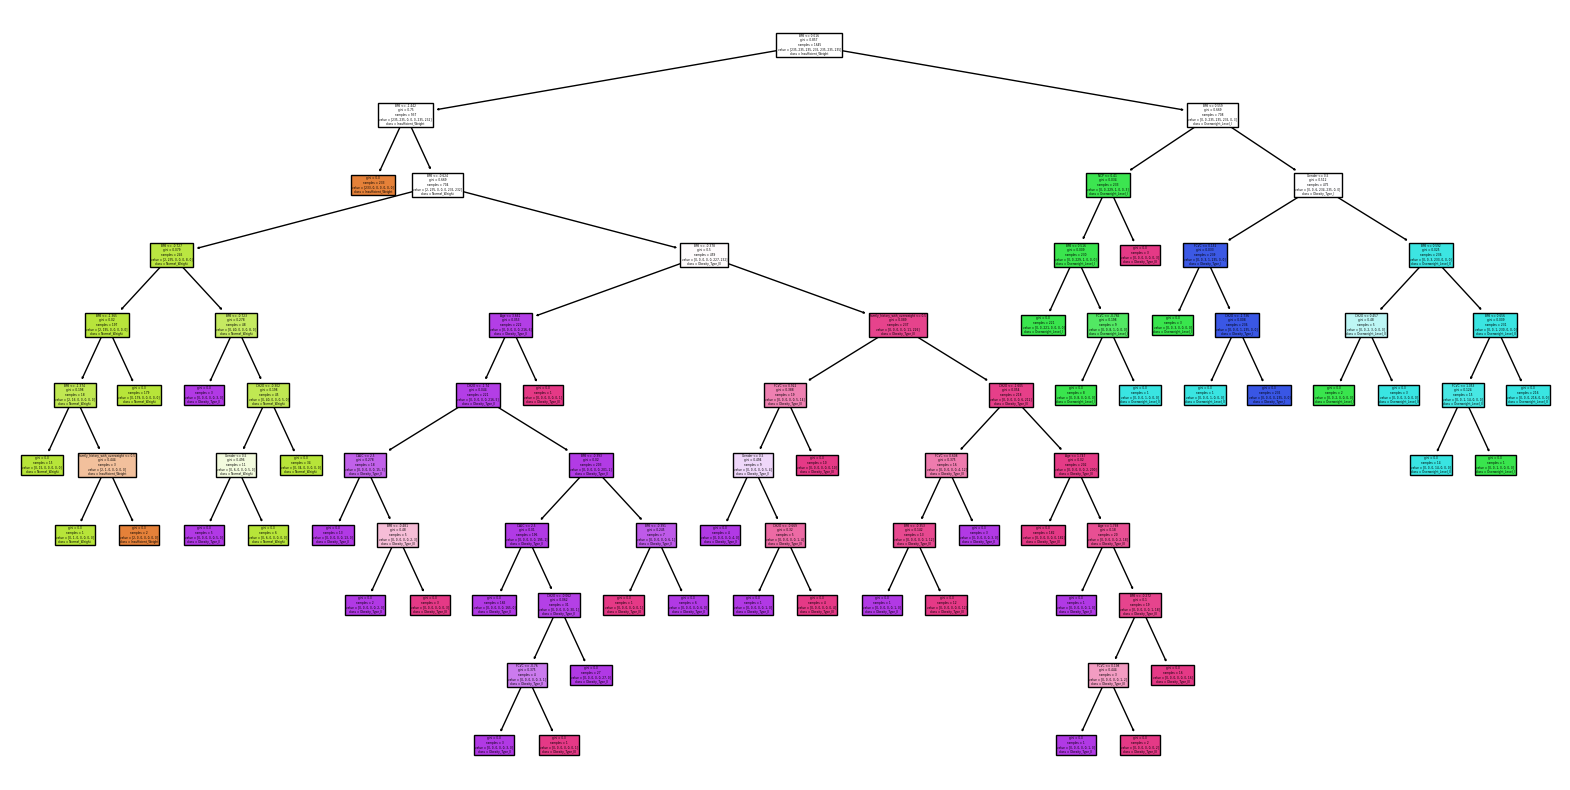

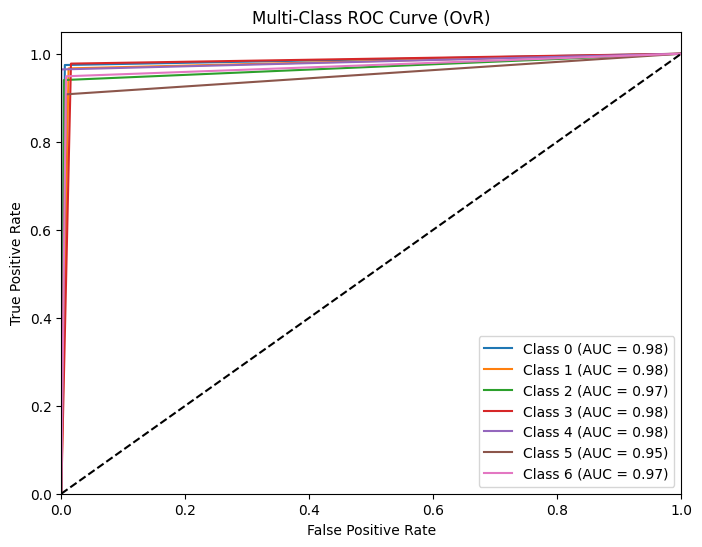

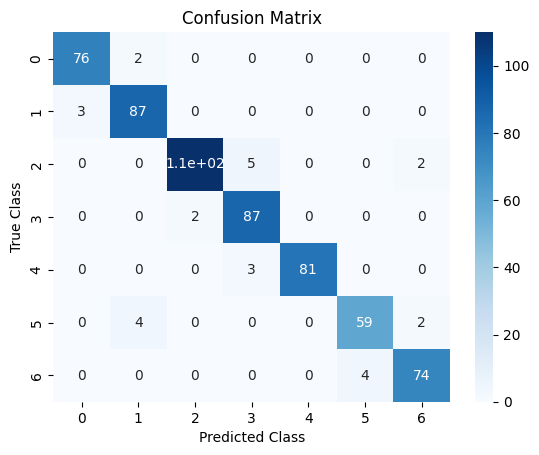

Accuracy:  0.9550748752079867
------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------


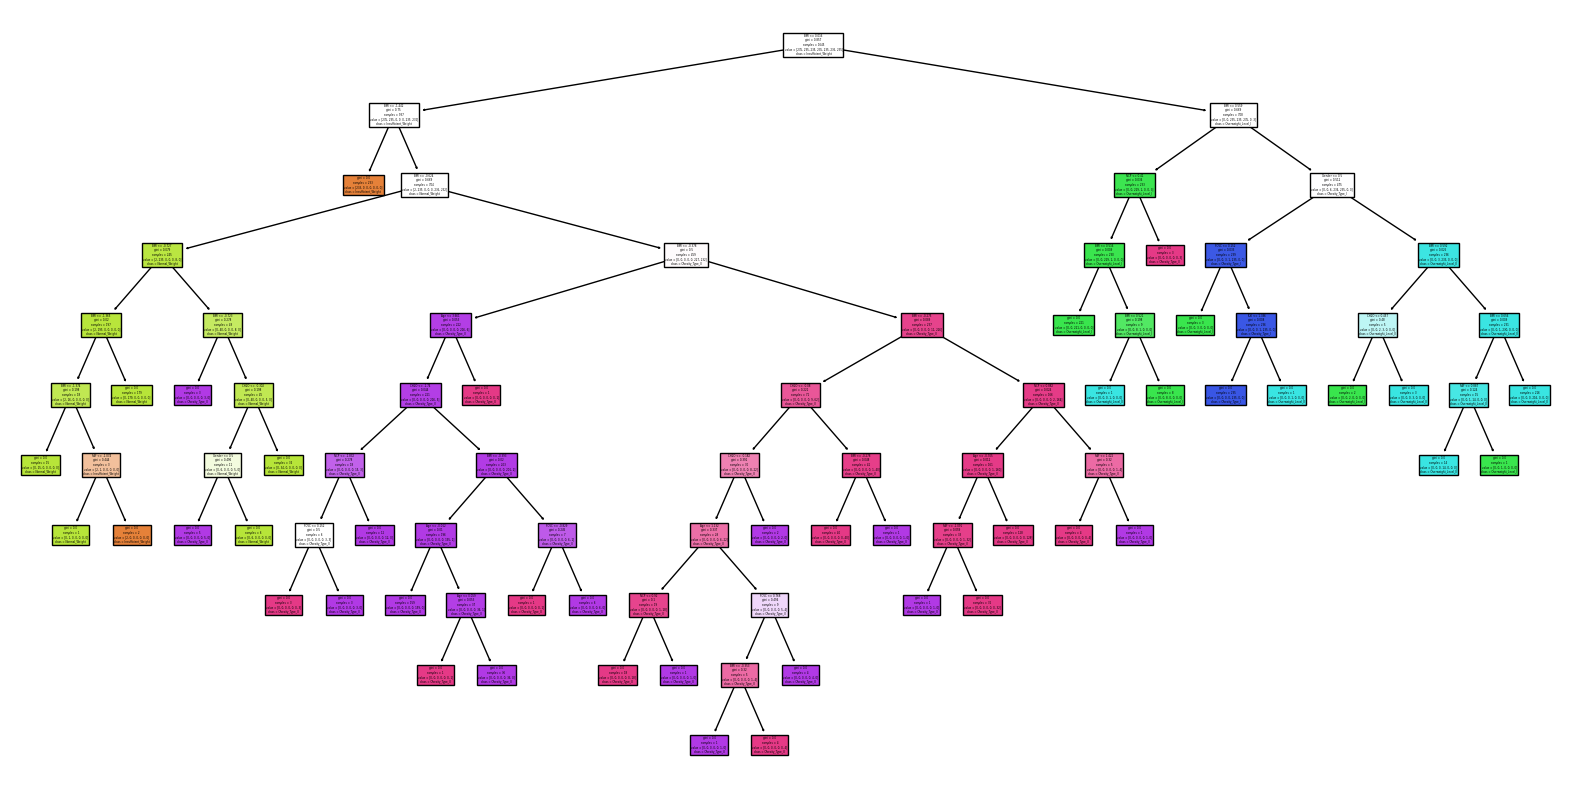

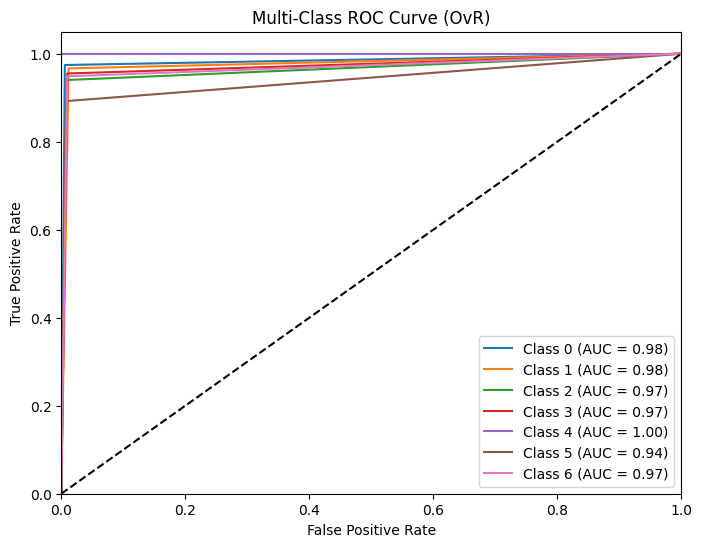

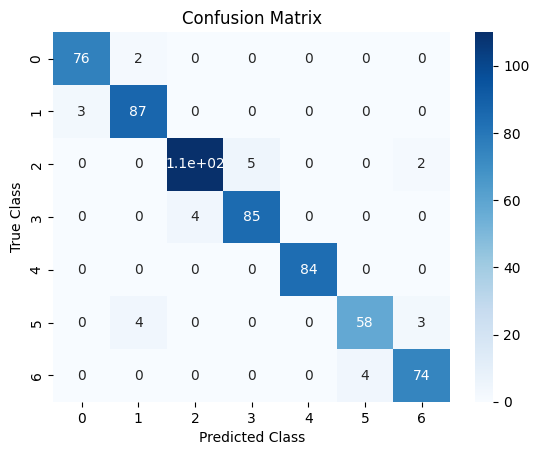

Accuracy:  0.9550748752079867
--------------------- Grid Search with cross validation --------------------------

Accuracy: 0.975 (0.009)


In [359]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def decision_tree(X_train, y_train, X_test, y_test):
    # make predictions on the test set
   

    # create a decision tree classifier object
    dtc = DecisionTreeClassifier()

    # fit the classifier to the training data
    dtc.fit(X_train, y_train)

    # visualize the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(dtc, feature_names=X_train.columns, class_names = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
    , filled=True)
    plt.show()

    
    y_pred = dtc.predict(X_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # calculate precision, recall, and F1-score for each class
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Make predictions for each class
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    # Calculate the predicted probabilities for each class
    y_scores = dtc.predict_proba(X_test)

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(i, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random classifier
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve (OvR)')
    plt.legend(loc='lower right')
    plt.show()


    # assume y_test is your true test set labels and y_pred is your predicted test set labels
    conf_matrix = confusion_matrix(y_test, y_pred)

    # plot confusion matrix heatmap
    sns.heatmap(conf_matrix, annot=True, cmap="Blues")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix")
    plt.show()
    print("Accuracy: ", accuracy)
    return accuracy 

print("--------------------- DATASET WITH ALL COLUMNS --------------------------\n")
decision_tree_accuracy = decision_tree(X_train, y_train, X_test, y_test)

print("------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------")
decision_tree_accuracy1 = decision_tree(X_train1, y_train1, X_test1, y_test1)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------")
decision_tree_accuracy2 = decision_tree(X_train2, y_train2, X_test2, y_test2)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------")
decision_tree_accuracy3 = decision_tree(X_train3, y_train3, X_test3, y_test3)

print("--------------------- Grid Search with cross validation --------------------------\n")

space = dict()
space['max_features'] = list(range(1, len(obesity_data_clean.drop('NObeyesdad', axis=1).columns)+1))
cross_folding(DecisionTreeClassifier(), space)

 ## Nayve Bayes Algorithm

The Naive Bayes algorithm is a simple probabilistic classifier based on Bayes' theorem. It assumes that features are conditionally independent given the class label. Despite its simplicity, Naive Bayes can perform well on many classification tasks, especially when there is a large amount of data available.

However, Naive Bayes can be less effective on our datasets for the following reasons:

Strong Feature Dependencies: The assumption of feature independence in Naive Bayes may not hold true if there are strong dependencies between features. In such cases, Naive Bayes can struggle to capture complex relationships and may result in suboptimal prediction

Small data available

--------------------- DATASET WITH ALL COLUMNS --------------------------

Accuracy: 83.69%


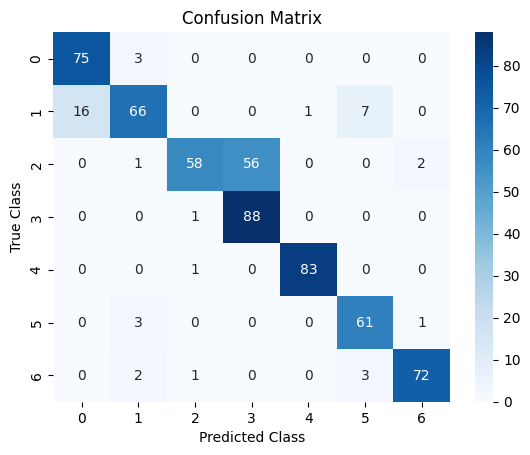

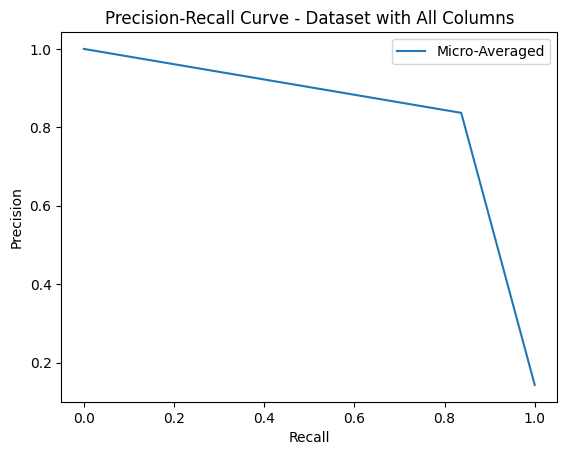

------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------
Accuracy: 86.69%


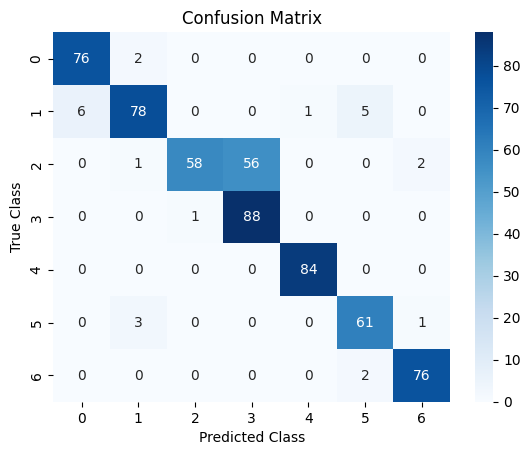

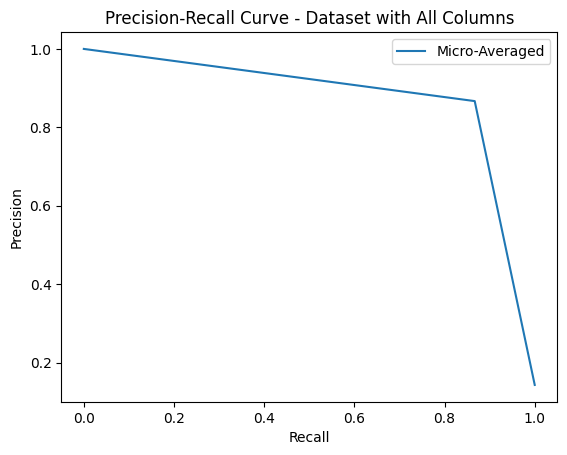

------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------
Accuracy: 85.86%


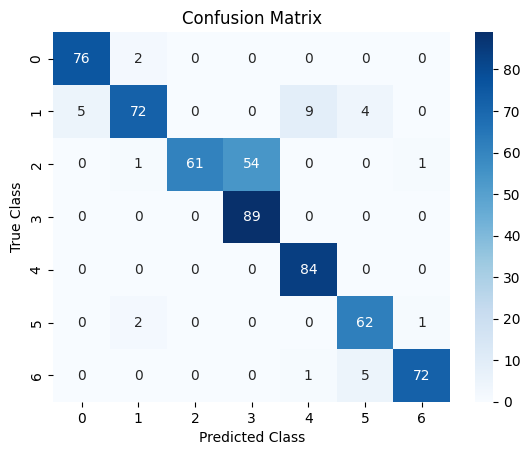

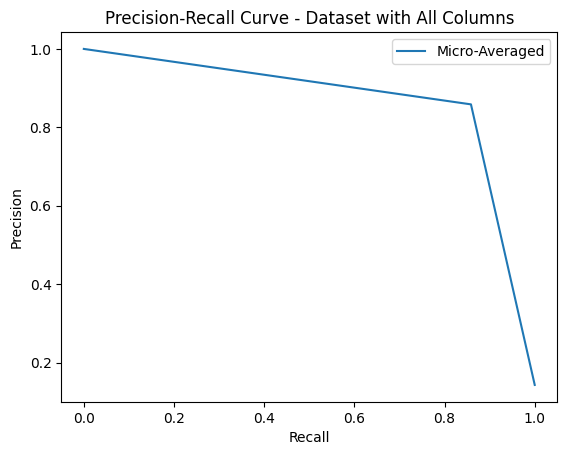

------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------
Accuracy: 93.84%


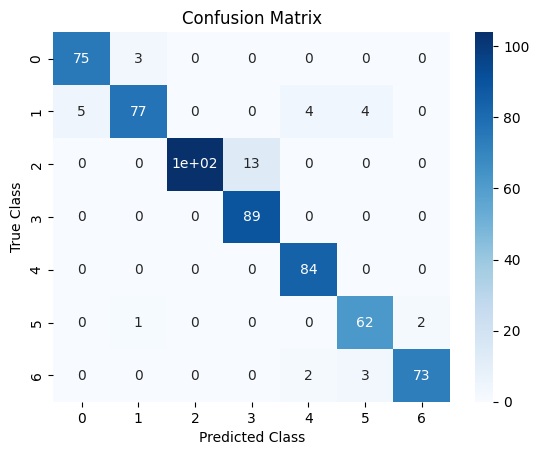

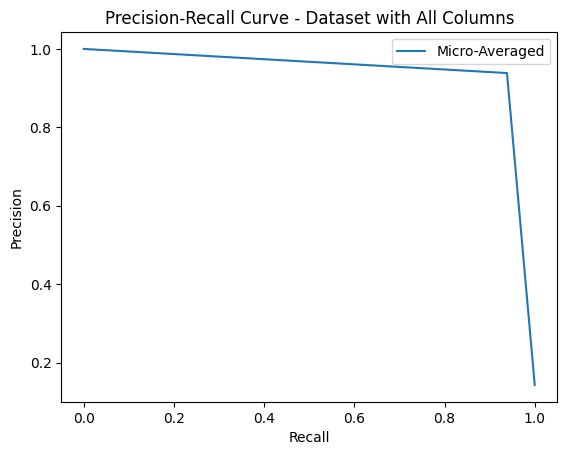

--------------------- Grid Search with cross validation --------------------------

Accuracy: 0.900 (0.041)


In [360]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


def nayve_bayes(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    # train the classifier on the training data
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)

    # calculate accuracy
    accuracy = gnb.score(X_test, y_test)
    print("Accuracy: {:.2%}".format(accuracy))

    # create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # create a heatmap of the confusion matrix
    sns.heatmap(conf_matrix, annot=True, cmap="Blues")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix")
    plt.show()

    # Convert y_test and y_pred to binary format
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

    # calculate precision and recall for each class
    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_bin.ravel())

    # calculate micro-averaged precision and recall
    micro_precision, micro_recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_bin.ravel())

    # plot the micro-averaged precision-recall curve
    plt.plot(micro_recall, micro_precision, label='Micro-Averaged')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Dataset with All Columns')
    plt.legend()
    plt.show()

    return accuracy 

print("--------------------- DATASET WITH ALL COLUMNS --------------------------\n")
nayve_bayes_accuracy = nayve_bayes(X_train, y_train, X_test, y_test)

print("------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------")
nayve_bayes_accuracy1 = nayve_bayes(X_train1, y_train1, X_test1, y_test1)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------")
nayve_bayes_accuracy2 = nayve_bayes(X_train2, y_train2, X_test2, y_test2)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------")
nayve_bayes_accuracy3 = nayve_bayes(X_train3, y_train3, X_test3, y_test3)

print("--------------------- Grid Search with cross validation --------------------------\n")

space = dict()
cross_folding(GaussianNB(), space)


The second graph represents the Precision-Recall curve. The curve shows how the precision of the classifier varies as the recall threshold changes. As the recall threshold increases, the classifier captures more positive cases, resulting in higher recall.

The ideal scenario is to have both high precision and high recall, represented by a curve that hugs the top-right corner of the graph. A higher area under the Precision-Recall curve indicates a better-performing classifier with a good balance between precision and recall.

## SVM

The SVM (Support Vector Machine) algorithm is a powerful and versatile supervised learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that maximally separates the data points of different classes in the feature space.

However, SVM may not perform well on certain datasets due to the following reasons:

<strong>Sensitive to Noise and Outliers</strong>: SVM aims to find a decision boundary with maximum margin, making it sensitive to noisy or outlier data points. Outliers can disproportionately influence the position of the hyperplane and lead to suboptimal classification results.

<strong>Lack of Probabilistic Interpretation</strong>: SVM originally provides binary classification and does not inherently provide probabilistic outputs. Additional techniques like Platt scaling or modified algorithms are required to estimate probabilities, making it less straightforward for tasks that require probability estimates.



--------------------- DATASET WITH ALL COLUMNS --------------------------

Accuracy: 96.01%


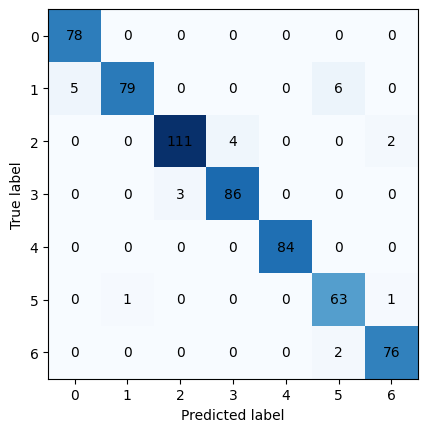

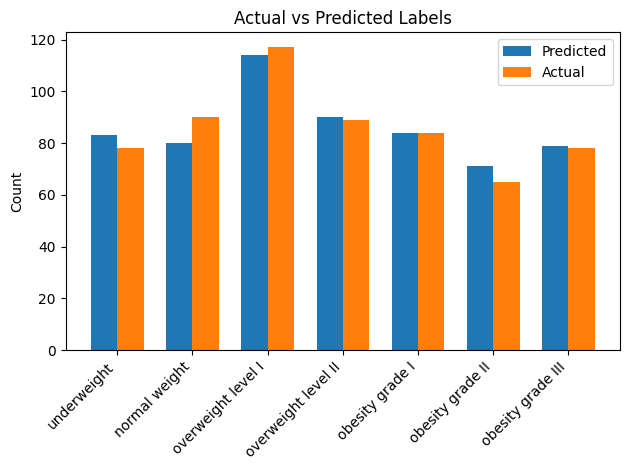

------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------
Accuracy: 96.17%


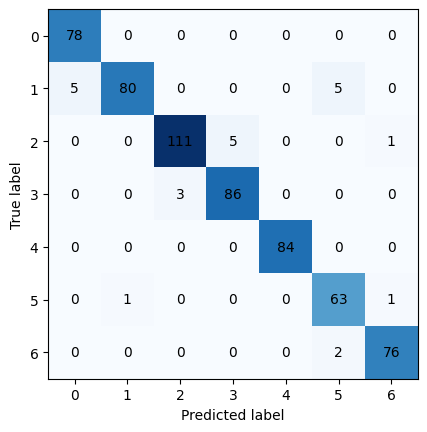

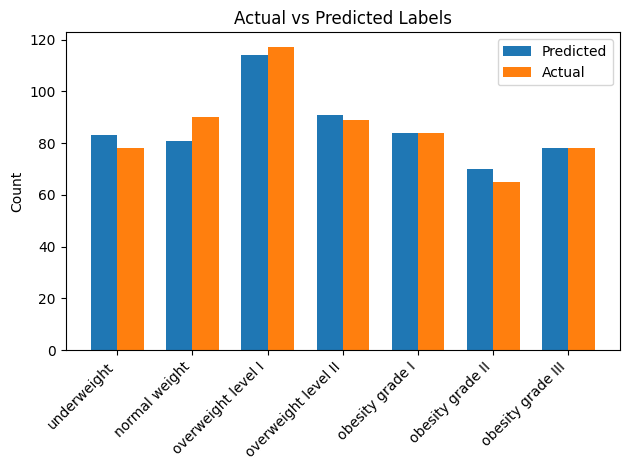

------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------
Accuracy: 95.34%


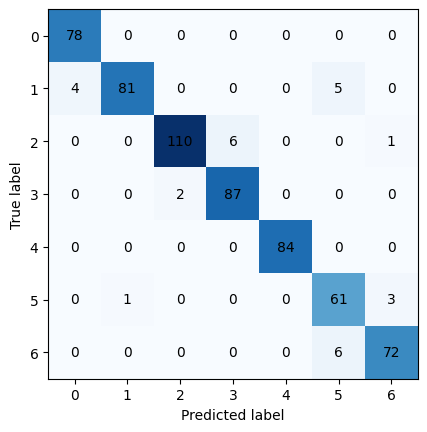

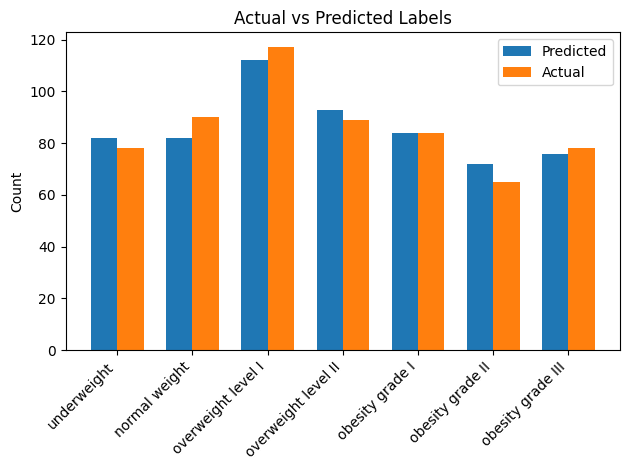

------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------
Accuracy: 95.84%


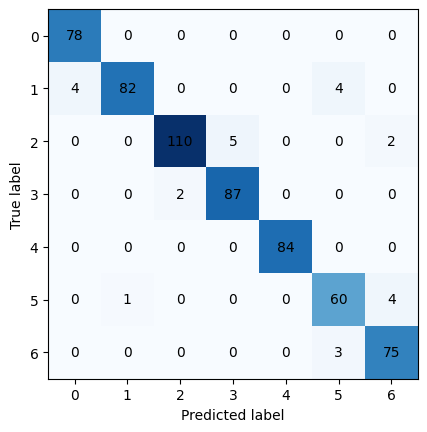

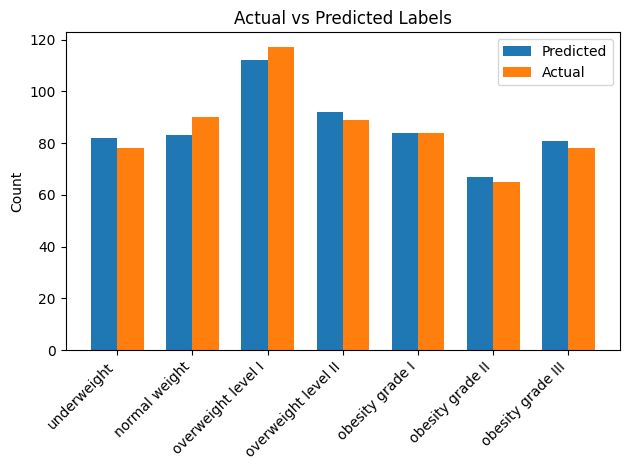

--------------------- Grid Search with cross validation --------------------------

Accuracy: 0.970 (0.012)


In [361]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def support_vector(X_train, y_train, X_test, y_test):
    # Create an instance of the SVM model
    model = svm.SVC(kernel='linear')

    # Train the model using the training set
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Print accuracy
    accuracy = np.mean(y_pred == y_test)
    print("Accuracy: {:.2%}".format(accuracy))

    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.imshow(cm, cmap='Blues', interpolation='None')
    plt.xticks(np.arange(7))
    plt.yticks(np.arange(7))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add labels to the plot
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')

    # Define the class labels
    labels = ['underweight', 'normal weight', 'overweight level I', 'overweight level II', 'obesity grade I', 'obesity grade II', 'obesity grade III']

    # Get the count of predicted and actual labels
    predicted_counts = [np.sum(y_pred == i) for i in np.unique(y_test)]
    actual_counts = [np.sum(y_test == i) for i in np.unique(y_test)]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, predicted_counts, width, label='Predicted')
    rects2 = ax.bar(x + width/2, actual_counts, width, label='Actual')

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_title('Actual vs Predicted Labels')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.legend()

    fig.tight_layout()

    plt.show()

    return accuracy 


print("--------------------- DATASET WITH ALL COLUMNS --------------------------\n")
svm_accuracy = support_vector(X_train, y_train, X_test, y_test)

print("------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------")
svm_accuracy1 = support_vector(X_train1, y_train1, X_test1, y_test1)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------")
svm_accuracy2 = support_vector(X_train2, y_train2, X_test2, y_test2)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------")
svm_accuracy3 = support_vector(X_train3, y_train3, X_test3, y_test3)

print("--------------------- Grid Search with cross validation --------------------------\n")

space = dict()
cross_folding(svm.SVC(kernel='linear'), space)


### Neural Network 🧠

Neural networks, specifically deep learning algorithms, are a class of machine learning models inspired by the structure and function of the human brain. They consist of interconnected nodes or "neurons" organized into layers, enabling them to learn complex patterns and representations from data.

<strong>Difficulty in Hyperparameter Tuning</strong>: Neural networks have numerous hyperparameters, such as the number of layers, the number of neurons per layer, activation functions, and learning rates. Selecting appropriate values for these hyperparameters requires expertise and extensive experimentation, which can be time-consuming and challenging.

<strong>Sensitive to Data Quality and Preprocessing</strong>: Neural networks are highly sensitive to the quality and preprocessing of the input data. Noisy or inconsistent data, outliers, or missing values can adversely affect their performance. Proper data preprocessing and cleaning are crucial for obtaining reliable results.

<strong>Prone to Overfitting</strong>: Neural networks, especially complex ones, are prone to overfitting if not properly regularized. Regularization techniques like dropout, weight decay, or early stopping are often employed to prevent overfitting and improve generalization.

<strong>Black Box Nature</strong>: Neural networks are often considered as "black box" models, meaning they lack interpretability compared to simpler algorithms. Understanding the inner workings and reasoning behind their predictions can be challenging, limiting their applicability in domains where interpretability is crucial.

--------------------- DATASET WITH ALL COLUMNS --------------------------

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 200)               3200      
                                                                 
 dense_109 (Dense)           (None, 75)                15075     
                                                                 
 dropout_36 (Dropout)        (None, 75)                0         
                                                                 
 dense_110 (Dense)           (None, 7)                 532       
                                                                 
Total params: 18807 (73.46 KB)
Trainable params: 18807 (73.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
52/52 [==============================] - 0s 598us/step - loss: 

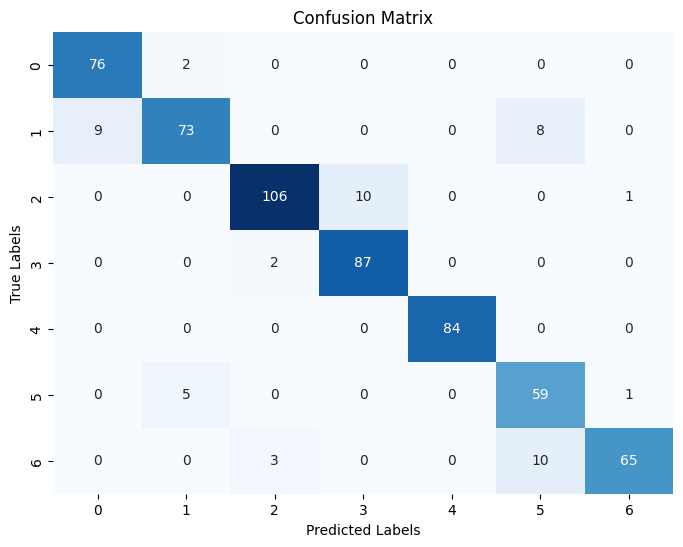

------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 200)               2800      
                                                                 
 dense_112 (Dense)           (None, 75)                15075     
                                                                 
 dropout_37 (Dropout)        (None, 75)                0         
                                                                 
 dense_113 (Dense)           (None, 7)                 532       
                                                                 
Total params: 18407 (71.90 KB)
Trainable params: 18407 (71.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
52/52 [==============================] - 0s 614us/step - loss: 1.4919 - accuracy: 0.4535
Epoch 2/10
52/52 [==============================]

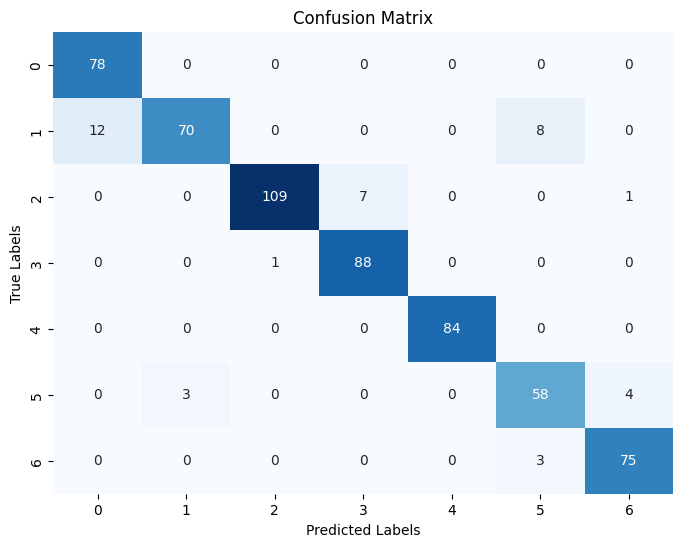

------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 200)               2200      
                                                                 
 dense_115 (Dense)           (None, 75)                15075     
                                                                 
 dropout_38 (Dropout)        (None, 75)                0         
                                                                 
 dense_116 (Dense)           (None, 7)                 532       
                                                                 
Total params: 17807 (69.56 KB)
Trainable params: 17807 (69.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
52/52 [============

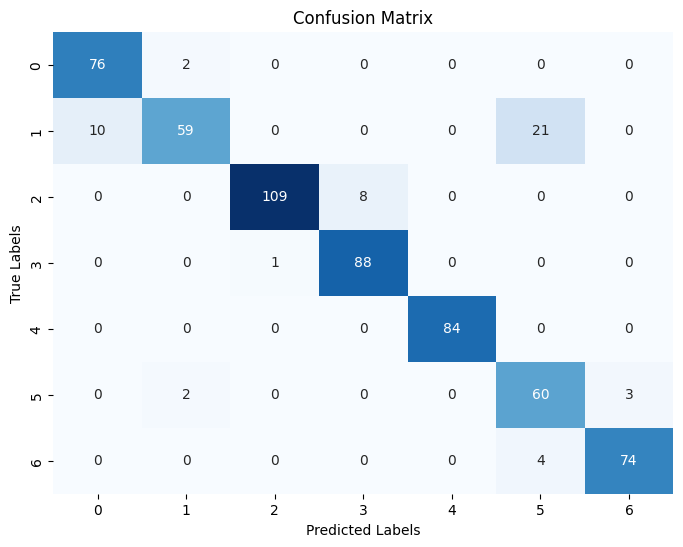

------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 200)               1800      
                                                                 
 dense_118 (Dense)           (None, 75)                15075     
                                                                 
 dropout_39 (Dropout)        (None, 75)                0         
                                                                 
 dense_119 (Dense)           (None, 7)                 532       
                                                                 
Total params: 17407 (68.00 KB)
Trainable params: 17407 (68.00 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________

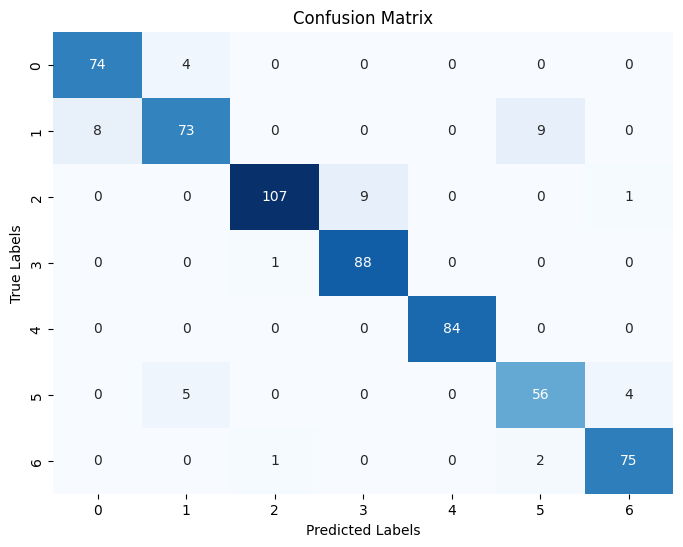

In [362]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np

def neural_network(X_train, y_train, X_test, y_test):
    # Generate or load your training data (X_train, y_train)
    # Make sure the shape of X_train and y_train is appropriate

    # Determine the number of input features
    input_dim = X_train.shape[1]

    # Determine the number of classes
    num_classes = 7

    # Define the model architecture
    model = Sequential()
    model.add(Dense(200, input_shape=(input_dim,), activation='relu'))
    model.add(Dense(75, activation='relu'))
    #To prevent overfitting, we add a dropout layer
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

    # Print the model summary
    model.summary()

    # Convert the target data to one-hot encoded format
    y_train_encoded = np.eye(num_classes)[y_train]

    # Train the model
    model.fit(X_train, y_train_encoded, verbose=1, epochs=10)

    # Perform predictions on test data
    y_pred_encoded = model.predict(X_test)
    y_pred = np.argmax(y_pred_encoded, axis=1)

    # Evaluate the model
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print("Accuracy:", accuracy)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    return accuracy 

print("--------------------- DATASET WITH ALL COLUMNS --------------------------\n")
nn_accuracy = neural_network(X_train, y_train, X_test, y_test)

print("------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------")
nn_accuracy1 = neural_network(X_train1, y_train1, X_test1, y_test1)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------")
nn_accuracy2 = neural_network(X_train2, y_train2, X_test2, y_test2)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------")
nn_accuracy3 = neural_network(X_train3, y_train3, X_test3, y_test3)



### K-nearest neighbours 🏡🏠

The k-Nearest Neighbors (k-NN) algorithm is a non-parametric, instance-based supervised learning algorithm. It classifies a new data point by comparing it to the k nearest neighbors in the training dataset based on a distance metric (e.g., Euclidean distance).

<strong>Sensitive to Irrelevant Features</strong>: k-NN considers all features equally important when calculating distances. If the dataset contains irrelevant features or features with different scales, it can negatively impact the accuracy of the algorithm. Feature selection or dimensionality reduction techniques may be required to mitigate this issue.

<strong>Imbalanced Data</strong>: In datasets with imbalanced class distributions, k-NN tends to favor the majority class due to the voting mechanism. This can lead to biased predictions and poor performance on the minority class. Resampling techniques or adjusting the voting mechanism can help alleviate this problem.




--------------------- DATASET WITH ALL COLUMNS --------------------------



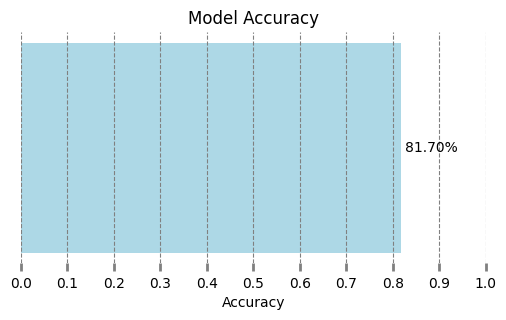

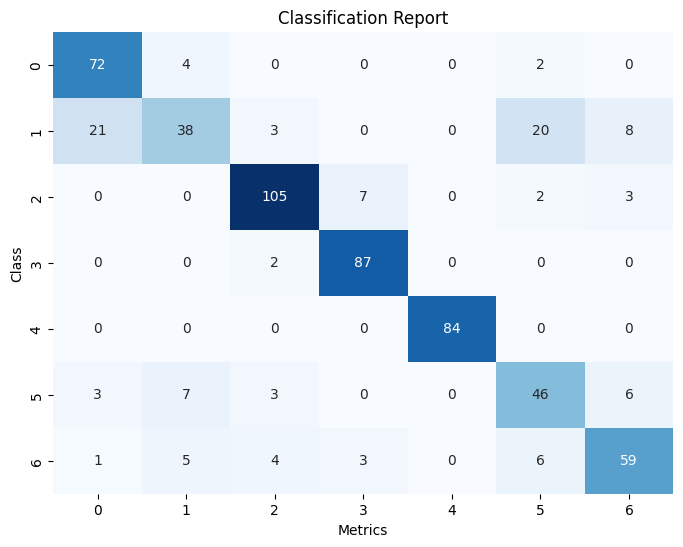

Accuracy:  0.8169717138103162
------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------


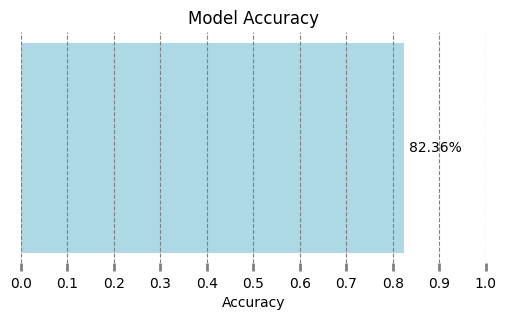

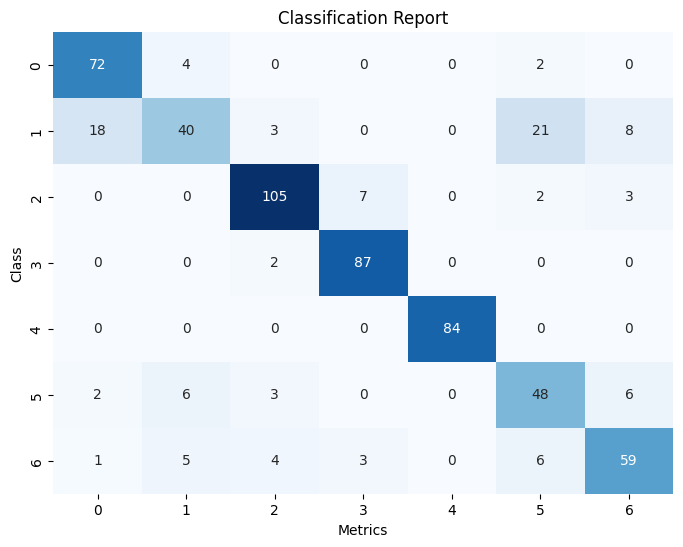

Accuracy:  0.8236272878535774
------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------


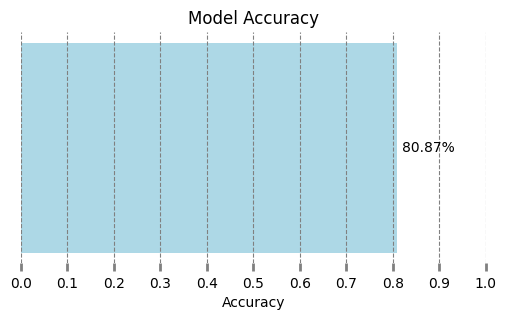

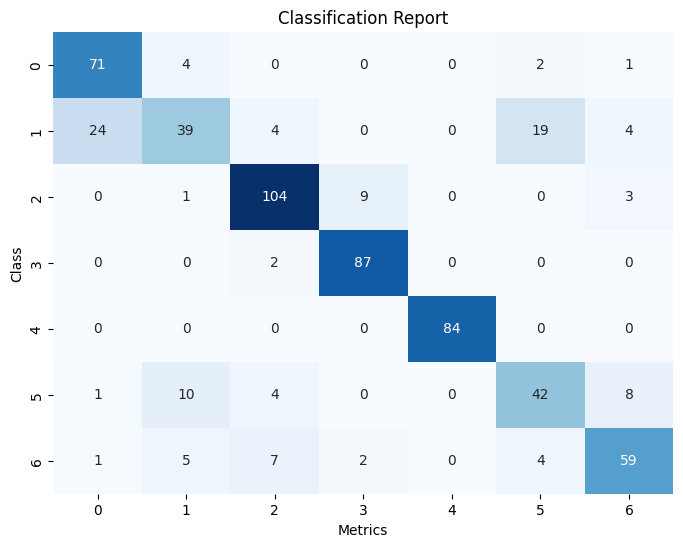

Accuracy:  0.8086522462562395
------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------


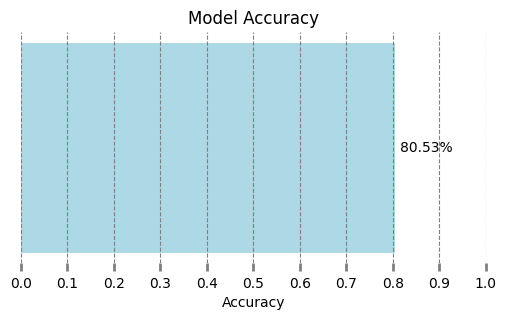

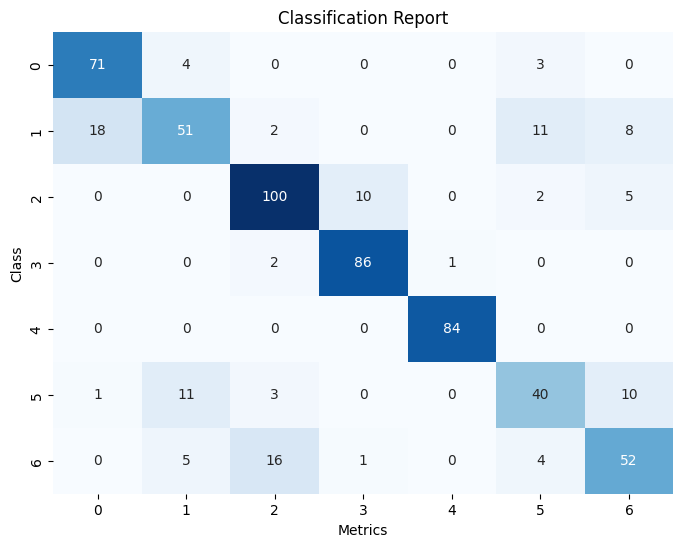

Accuracy:  0.8053244592346089
--------------------- Grid Search with cross validation --------------------------

Accuracy: 0.890 (0.025)


In [363]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create an instance of the KNN model

def k_nearest_neighbors(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=3)

    # Train the model using the training set
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)

    # Visualize accuracy
    plt.figure(figsize=(6, 3))
    plt.barh([0], [accuracy], color='lightblue')
    plt.xlim(0, 1)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks([])
    plt.xlabel('Accuracy')
    plt.title('Model Accuracy')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(left=False, labelleft=False)
    plt.gca().tick_params(axis='x', direction='out', length=6, width=2, color='gray')
    plt.gca().tick_params(axis='x', which='minor', bottom=False, labelbottom=False)
    plt.grid(axis='x', color='gray', linestyle='--')

    # Add numerical value annotation
    plt.text(accuracy + 0.01, 0, '{:.2%}'.format(accuracy), va='center')
    plt.show()


    # Plot the classification report as a heatmap
    report = classification_report(y_test, y_pred)
    report_lines = report.split("\n")[2:-5]
    labels = []
    data = []
    for line in report_lines:
        row = line.split()
        if len(row) > 1:
            labels.append(row[0])
            values = [float(x) for x in row[1: len(row) - 1]]
            data.append(values)
    data = np.array(data)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    #sns.heatmap(data, annot=True, cmap='Blues', cbar=False, xticklabels=["Precision", "Recall", "F1-score"], yticklabels=labels)
    plt.xlabel('Metrics')
    plt.ylabel('Class')
    plt.title('Classification Report')
    plt.show()

    print("Accuracy: ", accuracy)
    return accuracy

print("--------------------- DATASET WITH ALL COLUMNS --------------------------\n")
k_nearest_neighbors_accuracy = k_nearest_neighbors(X_train, y_train, X_test, y_test)

print("------------------------------ DATASET WITHOUT SCC, SMOKE AND MTRANS -------------------------------------")
k_nearest_neighbors_accuracy1 = k_nearest_neighbors(X_train1, y_train1, X_test1, y_test1)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC AND FAVC -------------------------------------")
k_nearest_neighbors_accuracy2 = k_nearest_neighbors(X_train2, y_train2, X_test2, y_test2)

print("------------------------------ DATASET WITHOUT SCC, SMOKE, MTRANS, CAEC, FAVC, family_history_with_overweight AND CALC -------------------------------------")
k_nearest_neighbors_accuracy3 =k_nearest_neighbors(X_train3, y_train3, X_test3, y_test3)

print("--------------------- Grid Search with cross validation --------------------------\n")

space = dict()
cross_folding(KNeighborsClassifier(n_neighbors=3), space)


## Model Comparison 📊

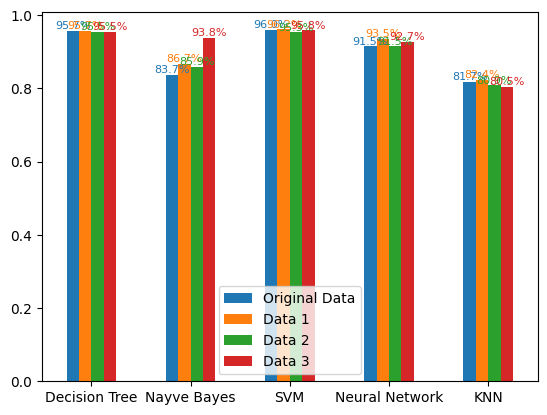

In [364]:
import pandas as pd
import matplotlib.pyplot as plt


data_values = [decision_tree_accuracy, nayve_bayes_accuracy, svm_accuracy, nn_accuracy,k_nearest_neighbors_accuracy]
data1_values = [decision_tree_accuracy1, nayve_bayes_accuracy1, svm_accuracy1, nn_accuracy1, k_nearest_neighbors_accuracy1]
data2_values = [decision_tree_accuracy2, nayve_bayes_accuracy2, svm_accuracy2, nn_accuracy2, k_nearest_neighbors_accuracy2]
data3_values = [decision_tree_accuracy3, nayve_bayes_accuracy3, svm_accuracy3, nn_accuracy3, k_nearest_neighbors_accuracy3]

index = ['Decision Tree', 'Nayve Bayes', 'SVM', 'Neural Network', 'KNN']
df = pd.DataFrame({'Original Data': data_values,
                    'Data 1': data1_values,
                    'Data 2': data2_values,
                    'Data 3': data3_values,
                    }, index=index)
ax = df.plot.bar(rot=0)

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:.1%}'
  #{"Accuracy: {:.2%}".format(accuracy)
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=8)

## References

#### Code
- [Scikit-Learn](https://scikit-learn.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Pandas](https://pandas.pydata.org/)
- [Imblearn](https://imbalanced-learn.org/stable/)

#### Articles

- J. Pajuelo Ramírez, L. Torres Aparcana, R. Agüero Zamora, y I. Bernui Leo
El sobrepeso, la obesidad y la obesidad abdominal en la población adulta del Perú
An Fac Med, 80 (1) (2019)

- T. W Elffers, R. de Mutsert, H. J Lamb, A. de Roo, K.W. van Dijk, F. R Rosendaal, J. Wouter Jukema, y S. Trompet
Body fat distribution, in particular visceral fat, is associated with cardiometabolic risk factors in obese women
PLoS One (2017)

- M. Safaei, E.A. Sundararajan, W. Boulila, y A. Shapi'i
A systematic literature review on obesity: understanding the causes & consequences of obesity and reviewing various machine learning approaches used to predict obesity
Comput Biol Med, 136 (104754) (2021)
